# Case Study - Telecom Churn
## Done by 
1. <b><font color="#FF0000">Pranesh</font></b>
2. <b><font color="#FF0000">Nainoor</font></b>

#### Note: Version of imblearn 0.5.0

In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from impyute.imputation.cs import mice
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.preprocessing import StandardScaler, Normalizer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from statsmodels.discrete.discrete_model import Logit
from sklearn.metrics import recall_score,precision_score
from sklearn.decomposition import PCA
import imblearn
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [5]:
data = pd.read_csv('telecom_churn_data.csv')

In [6]:
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)

In [7]:
list(data.columns)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [8]:
data[data['mobile_number']==7000842753]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.1,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,5.44,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,2

In [9]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [10]:
len(data)

99999

# Data Cleaning

In [11]:
# checking for null values
(100*data.isnull().sum()/len(data)).reset_index().sort_values(by=0,ascending=False)

,index,0
189,arpu_3g_6,74.846748
197,night_pck_user_6,74.846748
161,total_rech_data_6,74.846748
193,arpu_2g_6,74.846748
165,max_rech_data_6,74.846748
217,fb_user_6,74.846748
177,av_rech_amt_data_6,74.846748
157,date_of_last_rech_data_6,74.846748
169,count_rech_2g_6,74.846748
173,count_rech_3g_6,74.846748


In [12]:
data[['total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']] = \
data[['total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']].fillna(value=0)

As total_recharge_data can be safely assumed to be zero now we see that the columns needed for filtering out high-value customers have no null value. So we first filter the data.

In [13]:
data['av_rech_6_7'] =  0 
data.loc[:,:]['av_rech_6_7'] = 0.5*(data.loc[:,:]['total_rech_amt_6']+ data.loc[:,:]['total_rech_data_6']*data.loc[:,:]['av_rech_amt_data_6']
                                    + data.loc[:,:]['total_rech_data_7']*data.loc[:,:]['av_rech_amt_data_7']+data.loc[:,:]['total_rech_amt_7'])
sorted_recharge = data['av_rech_6_7'].sort_values()
index_rech = list(sorted_recharge.index)
seventy_percentile = sorted_recharge[index_rech[int(len(index_rech)*0.7)]]

In [14]:
data_high = data[data['av_rech_6_7']>seventy_percentile]

In [15]:
len(data_high)

29953

In [16]:
(100*data_high.isnull().sum()/len(data_high)).reset_index().sort_values(by=[0,'index'],ascending=False)

,index,0
164,total_rech_data_9,49.253831
200,night_pck_user_9,49.253831
168,max_rech_data_9,49.253831
220,fb_user_9,49.253831
160,date_of_last_rech_data_9,49.253831
176,count_rech_3g_9,49.253831
172,count_rech_2g_9,49.253831
180,av_rech_amt_data_9,49.253831
192,arpu_3g_9,49.253831
196,arpu_2g_9,49.253831


We see number of columns with very high-percent of null values has reduced. But still a considerable amount shows null values.

In [17]:
len(data_high.columns)

227

In [18]:
data_high[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()/len(data_high)

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

We again see that the columns we need for marking churn customers have no null-values. So, we can mark churn and no-churn and drop all columns for month 9.

In [19]:
data_high[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,29953.000000,29953.000000,29953.000000,29953.000000
mean,265.079232,501.141639,91.405987,349.915812
std,358.502996,667.138160,282.104414,947.700826
min,0.000000,0.000000,0.000000,0.000000
25%,50.490000,47.730000,0.000000,0.000000
50%,158.030000,285.130000,0.000000,0.000000
75%,343.960000,698.790000,38.020000,321.570000
max,7785.730000,11517.730000,8993.950000,39221.270000


In [20]:
data_high['total_usage_9'] = 0
data_high.loc[:,:]['total_usage_9'] = (data_high.loc[:,:]['total_ic_mou_9'] + data_high.loc[:,:]['total_og_mou_9'] +
                                      data_high.loc[:,:]['vol_2g_mb_9'] + data_high.loc[:,:]['vol_3g_mb_9'])

In [21]:
data_high['total_usage_9'].head()

0        0.00
7        0.00
8      177.09
21    1284.14
23     583.78
Name: total_usage_9, dtype: float64

In [22]:
data_high['Churn'] = data_high.apply(lambda x: 1 if x['total_usage_9']==0 else 0,axis=1)

In [23]:
data_high['Churn'].value_counts()

0    27520
1     2433
Name: Churn, dtype: int64

In [24]:
all_columns = list(data_high.columns)
columns_9 = list(filter(lambda x: '9' in x,all_columns))

In [25]:
data_high.drop(columns_9,inplace=True,axis=1)

In [26]:
def boxplot(col1,col2,rot=90,count=0,input_data=data_high):
    plt.figure(figsize=(8,8))
    sns.boxplot(x=input_data[col1],y=input_data[col2])
    if count==1:
        plt.figure(figsize=(10,10))
        plt.xticks(rotation=rot)
        plt.title('Churn = 1')
        sns.countplot(input_data[input_data['Churn']==1][col2])
        plt.figure(figsize=(10,10))
        plt.xticks(rotation=rot)
        plt.title('Churn = 0')
        sns.countplot(input_data[input_data['Churn']==0][col2])
    plt.figure(figsize=(10,10))
    plt.xticks(rotation=rot)
    sns.distplot(input_data[(input_data['Churn']==0) & (~input_data[col2].isnull())][col2],color='r',label='0')
    sns.distplot(input_data[(input_data['Churn']==1) & (~input_data[col2].isnull())][col2],color='b',label='1')
    plt.legend()
    
def get_null(data):
    col_null = (100*data.isnull().sum()/len(data)).reset_index().sort_values(by=[0,'index'],ascending=False)
    col_null  = col_null[col_null[0]>0]
    return col_null

In [27]:
col_null = get_null(data_high)

In [28]:
high_null = list(col_null[col_null[0]>40]['index'])


Of the columns with high amount of null some of them can be directly imputed with 0.

In [29]:
print(high_null[0],data_high[high_null[0]].unique())
print(data_high[high_null[0]].value_counts())
print(high_null[2],data_high[high_null[2]].unique())
print(data_high[high_null[2]].value_counts())

night_pck_user_8 [ 0. nan  1.]
0.0    15594
1.0      341
Name: night_pck_user_8, dtype: int64
fb_user_8 [ 1. nan  0.]
1.0    14297
0.0     1638
Name: fb_user_8, dtype: int64


* night_pck_user - yes-no type column. The missing values can safely be assumed to be No.
* fb_user - again a yes-no type column

In [30]:
data_high[['night_pck_user_6','fb_user_6','night_pck_user_7','fb_user_7','night_pck_user_8','fb_user_8']] = \
data_high[['night_pck_user_6','fb_user_6','night_pck_user_7','fb_user_7','night_pck_user_8','fb_user_8']].fillna(0)

In [31]:
col_null = get_null(data_high)

In [32]:
high_null = list(col_null[col_null[0]>40]['index'])

In [33]:
high_null

['max_rech_data_8',
 'date_of_last_rech_data_8',
 'count_rech_3g_8',
 'count_rech_2g_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'max_rech_data_6',
 'date_of_last_rech_data_6',
 'count_rech_3g_6',
 'count_rech_2g_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'max_rech_data_7',
 'date_of_last_rech_data_7',
 'count_rech_3g_7',
 'count_rech_2g_7',
 'arpu_3g_7',
 'arpu_2g_7']

We see three date columns among the high null columns. Now, date directly is not useful, but the day of month can be useful as it can be indicator of days since last recharge. So, we extract the day of month.

In [34]:
data_high['day_of_last_rech_data_6'] = pd.to_datetime(data_high['date_of_last_rech_data_6']).dt.day
data_high['day_of_last_rech_data_7'] = pd.to_datetime(data_high['date_of_last_rech_data_7']).dt.day
data_high['day_of_last_rech_data_8'] = pd.to_datetime(data_high['date_of_last_rech_data_8']).dt.day
data_high.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)

Now having converted to date to day we can replace any null value in day by 0, as it will imply that recharge was not done in the month.

In [35]:
data_high[['day_of_last_rech_data_6','day_of_last_rech_data_7','day_of_last_rech_data_8']] = \
data_high[['day_of_last_rech_data_6','day_of_last_rech_data_7','day_of_last_rech_data_8']].fillna(0)

Of the left columns with high percent of null values, we  examine their effect on churn to determine whether to keep them.

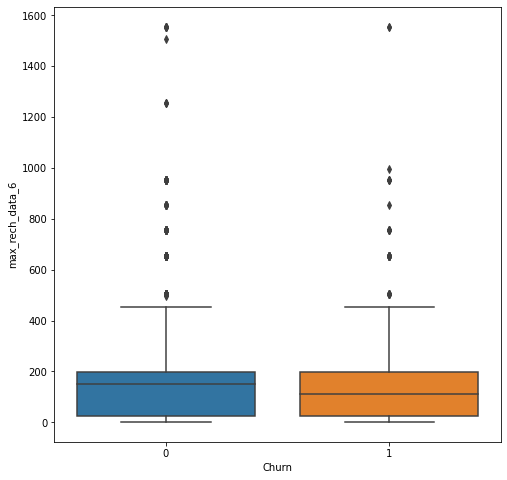

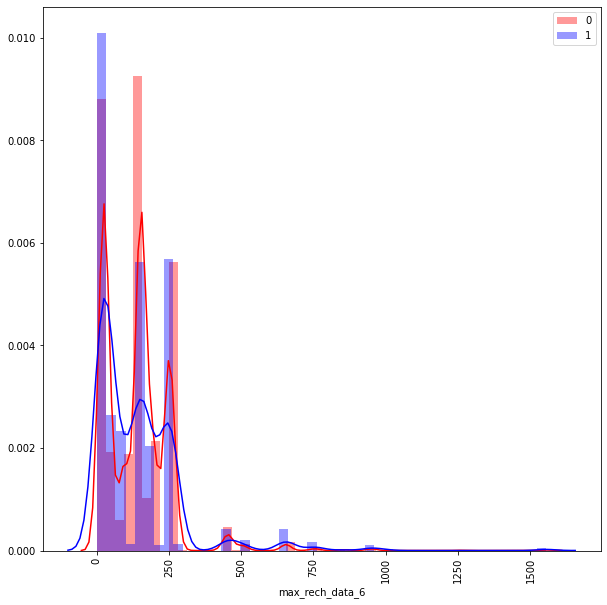

In [36]:
boxplot('Churn','max_rech_data_6',input_data=data_high)

We don't see any significant differentiation across churn and no-churn, so we can drop this column for all the three months.

In [37]:
data_high.drop(['max_rech_data_8','max_rech_data_6','max_rech_data_7'],axis=1,inplace=True)

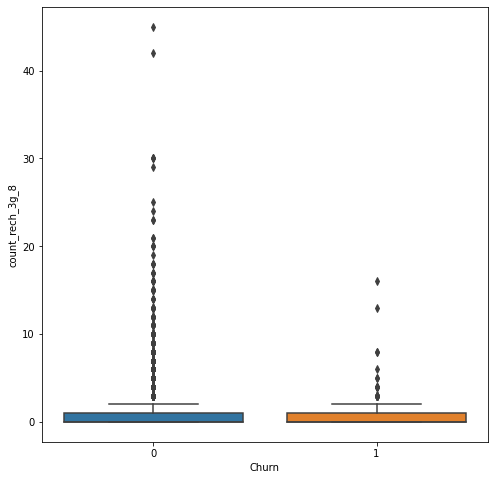

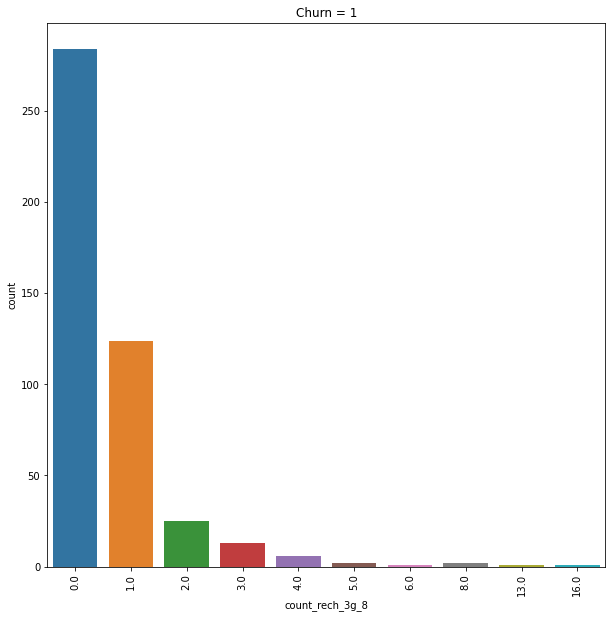

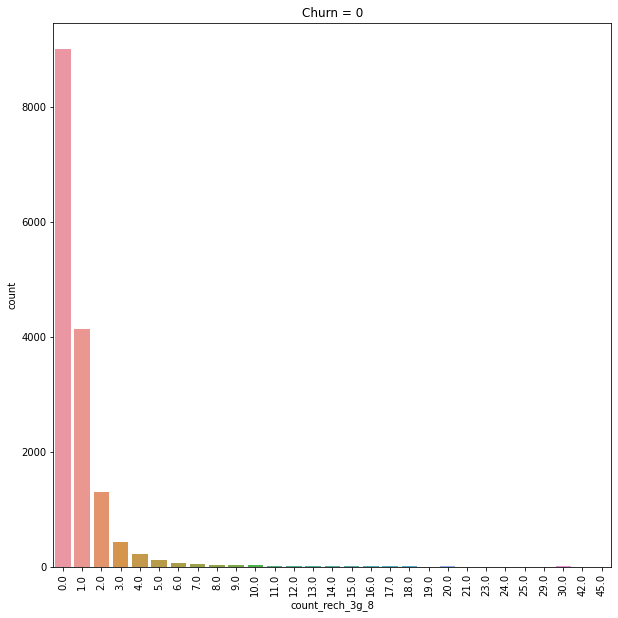

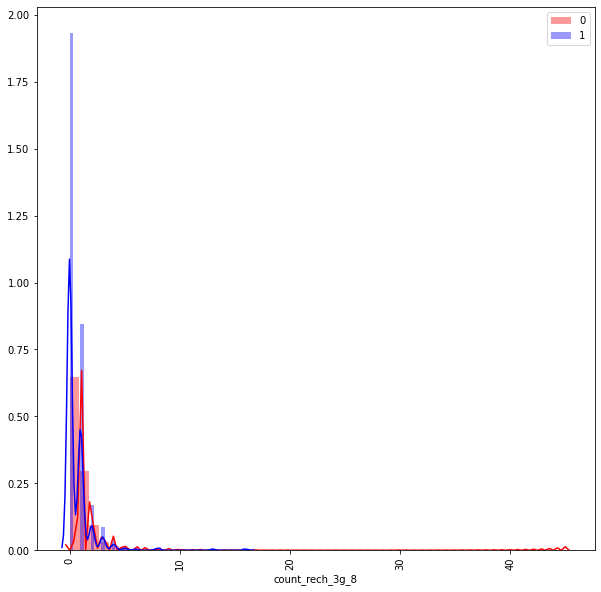

In [38]:
boxplot('Churn','count_rech_3g_8',count=1)

We see that for churn customers the values are upto 16 and while for non-churn it is 45, but in common range we don't see much variation.

In [39]:
data_high[data_high['Churn']==0]['count_rech_3g_8'].value_counts().head()

0.0    9008
1.0    4136
2.0    1298
3.0     433
4.0     214
Name: count_rech_3g_8, dtype: int64

In [40]:
data_high[data_high['Churn']==1]['count_rech_3g_8'].value_counts().head()

0.0    284
1.0    124
2.0     25
3.0     13
4.0      6
Name: count_rech_3g_8, dtype: int64

In [41]:
print(data_high[data_high['Churn']==0]['count_rech_3g_8'].median())
print(data_high[data_high['Churn']==1]['count_rech_3g_8'].median())
print(data_high[data_high['Churn']==0]['count_rech_3g_8'].mean())
print(data_high[data_high['Churn']==1]['count_rech_3g_8'].mean())


0.0
0.0
0.7814680796071336
0.6492374727668845


In [42]:
data_high[data_high['count_rech_3g_8'].isnull()]['Churn'].value_counts()

0    12044
1     1974
Name: Churn, dtype: int64

In [43]:
data_high['Churn'].value_counts()

0    27520
1     2433
Name: Churn, dtype: int64

We see that almost all churn values (more than 80%) have null value for this column. Introducing a imputation value of 0 will make the values for the entire column too close to homogeneous, but the difference between high number of recharges being always non-churn is preserved.

In [44]:
data_high['count_rech_3g_8'].fillna(0,inplace=True)
data_high['count_rech_3g_6'].fillna(0,inplace=True)
data_high['count_rech_3g_7'].fillna(0,inplace=True)

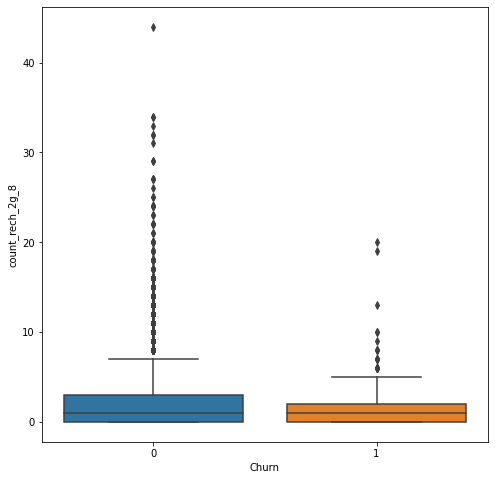

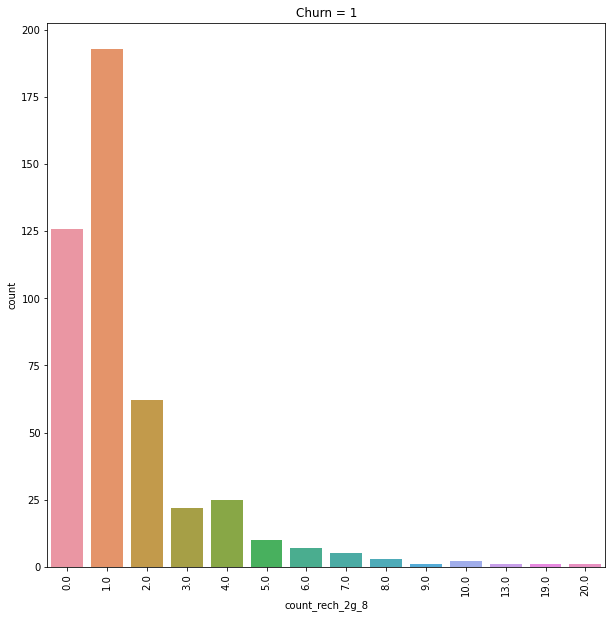

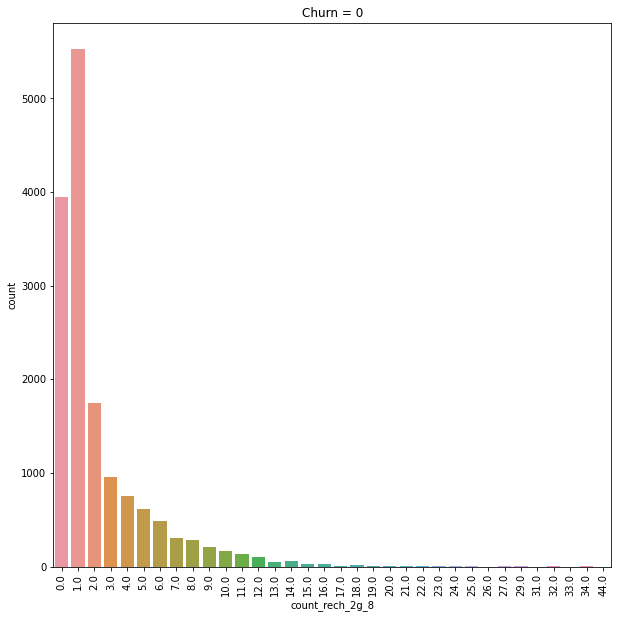

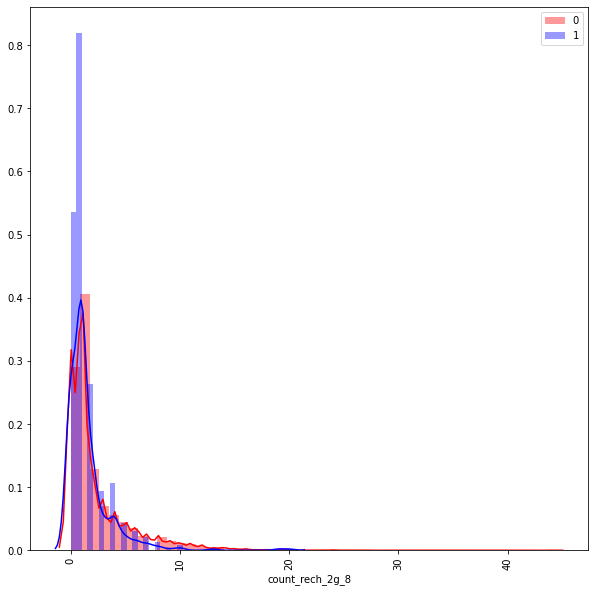

In [45]:
boxplot('Churn','count_rech_2g_8',count=1)

We see an exactly same pattern as before in 3g count. So we replace the nulls by 0.

In [46]:
data_high['count_rech_2g_8'].fillna(0,inplace=True)
data_high['count_rech_2g_6'].fillna(0,inplace=True)
data_high['count_rech_2g_7'].fillna(0,inplace=True)

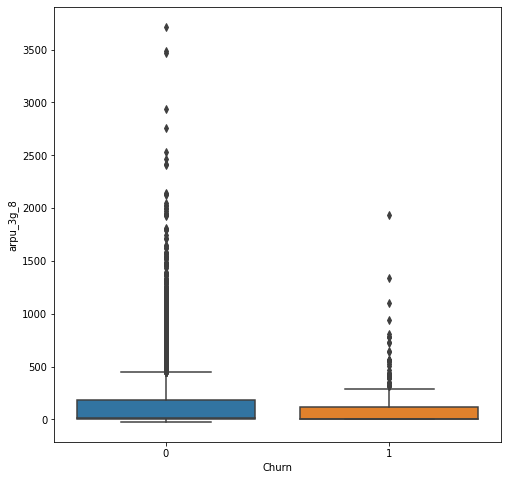

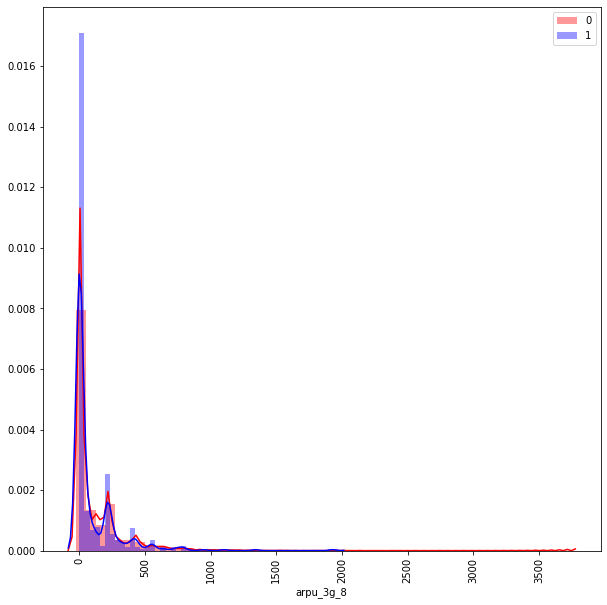

In [47]:
boxplot('Churn','arpu_3g_8')

In [48]:
print(data_high[data_high['Churn']==0]['arpu_3g_8'].median())
print(data_high[data_high['Churn']==1]['arpu_3g_8'].median())
print(data_high[data_high['Churn']==0]['arpu_3g_8'].mean())
print(data_high[data_high['Churn']==1]['arpu_3g_8'].mean())


10.795
0.0
118.75890798655959
96.0942701525054


In [49]:
data_high[data_high['arpu_3g_8'].isnull()]['Churn'].value_counts()

0    12044
1     1974
Name: Churn, dtype: int64

We see a distinct difference in median value. So, we use monte-carlo imutation.

In [50]:
arpu_3g_8  = mice(data_high[['arpu_3g_8','Churn']].values)

In [51]:
data_high['arpu_3g_8'] = arpu_3g_8[:,0]

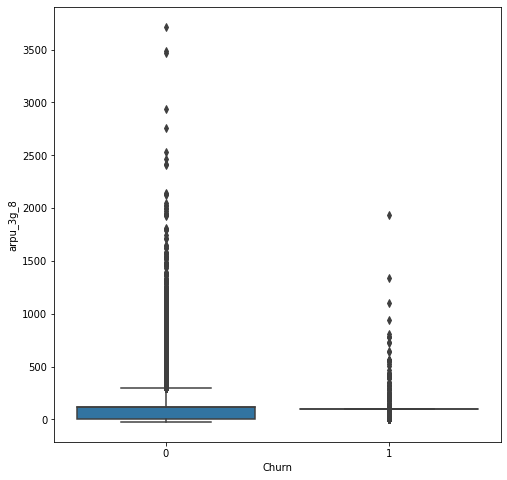

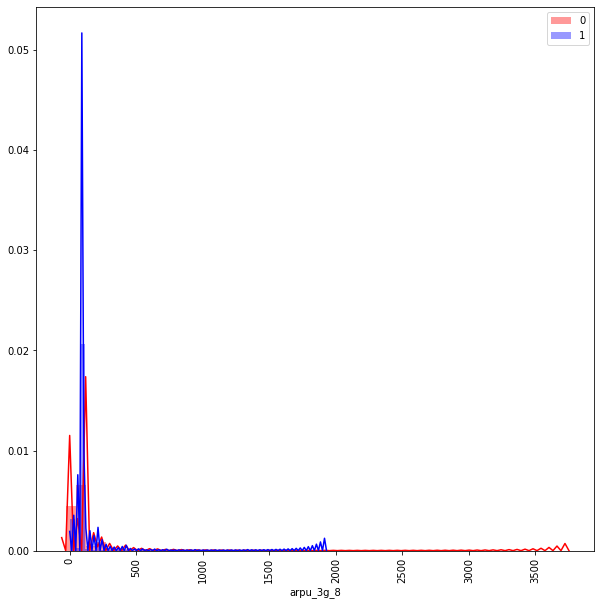

In [52]:
boxplot('Churn','arpu_3g_8')

In [53]:
print(data_high[data_high['Churn']==0]['arpu_3g_8'].median())
print(data_high[data_high['Churn']==1]['arpu_3g_8'].median())
print(data_high[data_high['Churn']==0]['arpu_3g_8'].mean())
print(data_high[data_high['Churn']==1]['arpu_3g_8'].mean())


118.75890798655985
96.09427015250515
118.75890798652605
96.09427015250556


We see exactly same distribution for all the other arpu variables, but let us check difference in means and medians,

In [54]:
print(data_high[data_high['Churn']==0]['arpu_3g_7'].median())
print(data_high[data_high['Churn']==1]['arpu_3g_7'].median())
print(data_high[data_high['Churn']==0]['arpu_3g_7'].mean())
print(data_high[data_high['Churn']==1]['arpu_3g_7'].mean())


12.94
14.42
120.43553344938955
127.13751572327038


In [55]:
print(data_high[data_high['Churn']==0]['arpu_3g_6'].median())
print(data_high[data_high['Churn']==1]['arpu_3g_6'].median())
print(data_high[data_high['Churn']==0]['arpu_3g_6'].mean())
print(data_high[data_high['Churn']==1]['arpu_3g_6'].mean())


14.405000000000001
22.270000000000003
118.50229497693397
141.47281802120156


We see for there exists a difference in means as well as medians, implying two different distributions. So, again we apply mice (Multiple Imputation by Chained Equations)

In [56]:
arpu_3g_6  = mice(data_high[['arpu_3g_6','Churn']].values)
arpu_3g_7  = mice(data_high[['arpu_3g_7','Churn']].values)
data_high['arpu_3g_6'] = arpu_3g_6[:,0]
data_high['arpu_3g_7'] = arpu_3g_7[:,0]

In [57]:
print(data_high[~data_high['arpu_2g_6'].isnull()][['arpu_2g_6','arpu_3g_6']].corr())
print(data_high[~data_high['arpu_2g_7'].isnull()][['arpu_2g_7','arpu_3g_7']].corr())
print(data_high[~data_high['arpu_2g_8'].isnull()][['arpu_2g_8','arpu_3g_8']].corr())


           arpu_2g_6  arpu_3g_6
arpu_2g_6   1.000000   0.932369
arpu_3g_6   0.932369   1.000000
           arpu_2g_7  arpu_3g_7
arpu_2g_7   1.000000   0.928593
arpu_3g_7   0.928593   1.000000
           arpu_2g_8  arpu_3g_8
arpu_2g_8   1.000000   0.928997
arpu_3g_8   0.928997   1.000000


We see that arpu 3g and 2g variables are extremely highly correlated. So, we drop the 2g columns.

In [58]:
data_high.drop(['arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

In [59]:
col_null = get_null(data_high)

In [60]:
col_null.head()

,index,0
40,std_og_t2t_mou_8,3.912797
43,std_og_t2m_mou_8,3.912797
46,std_og_t2f_mou_8,3.912797
49,std_og_t2c_mou_8,3.912797
52,std_og_mou_8,3.912797


We see we now have only the small number  of null valued columns remaining. Now as the class imbalance in the dataset is high we cannot afford to drop churn labelled rows, but we can drop the non-churn rows as they will be a small precent of the total.

In [61]:
for i,row in col_null.iterrows():
    print(row['index'])
    print(data_high[data_high[row['index']].isnull()]['Churn'].value_counts())

std_og_t2t_mou_8
1    793
0    379
Name: Churn, dtype: int64
std_og_t2m_mou_8
1    793
0    379
Name: Churn, dtype: int64
std_og_t2f_mou_8
1    793
0    379
Name: Churn, dtype: int64
std_og_t2c_mou_8
1    793
0    379
Name: Churn, dtype: int64
std_og_mou_8
1    793
0    379
Name: Churn, dtype: int64
std_ic_t2t_mou_8
1    793
0    379
Name: Churn, dtype: int64
std_ic_t2o_mou_8
1    793
0    379
Name: Churn, dtype: int64
std_ic_t2m_mou_8
1    793
0    379
Name: Churn, dtype: int64
std_ic_t2f_mou_8
1    793
0    379
Name: Churn, dtype: int64
std_ic_mou_8
1    793
0    379
Name: Churn, dtype: int64
spl_og_mou_8
1    793
0    379
Name: Churn, dtype: int64
spl_ic_mou_8
1    793
0    379
Name: Churn, dtype: int64
roam_og_mou_8
1    793
0    379
Name: Churn, dtype: int64
roam_ic_mou_8
1    793
0    379
Name: Churn, dtype: int64
onnet_mou_8
1    793
0    379
Name: Churn, dtype: int64
og_others_8
1    793
0    379
Name: Churn, dtype: int64
offnet_mou_8
1    793
0    379
Name: Churn, dtype: int64

In the list we see three columns that store last dates. Those can be dirrectly imputed.

In [62]:
data_high.loc[data_high['last_date_of_month_6'].isnull(),'last_date_of_month_6'] = '6/30/2014'
data_high.loc[data_high['last_date_of_month_7'].isnull(),'last_date_of_month_7'] = '7/31/2014'
data_high.loc[data_high['last_date_of_month_8'].isnull(),'last_date_of_month_8'] = '8/31/2014'

In [63]:
data_high['Churn'].value_counts()

0    27520
1     2433
Name: Churn, dtype: int64

In [64]:
col_null = get_null(data_high)

In [65]:
data_high[col_null['index']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 93 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   std_og_t2t_mou_8     28781 non-null  float64
 1   std_og_t2m_mou_8     28781 non-null  float64
 2   std_og_t2f_mou_8     28781 non-null  float64
 3   std_og_t2c_mou_8     28781 non-null  float64
 4   std_og_mou_8         28781 non-null  float64
 5   std_ic_t2t_mou_8     28781 non-null  float64
 6   std_ic_t2o_mou_8     28781 non-null  float64
 7   std_ic_t2m_mou_8     28781 non-null  float64
 8   std_ic_t2f_mou_8     28781 non-null  float64
 9   std_ic_mou_8         28781 non-null  float64
 10  spl_og_mou_8         28781 non-null  float64
 11  spl_ic_mou_8         28781 non-null  float64
 12  roam_og_mou_8        28781 non-null  float64
 13  roam_ic_mou_8        28781 non-null  float64
 14  onnet_mou_8          28781 non-null  float64
 15  og_others_8          28781 non-null 

In [66]:
data_high[col_null['index']].describe()

,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_t2c_mou_8,std_og_mou_8,std_ic_t2t_mou_8,std_ic_t2o_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_og_mou_8,spl_ic_mou_8,roam_og_mou_8,roam_ic_mou_8,onnet_mou_8,og_others_8,offnet_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,isd_og_mou_8,isd_ic_mou_8,ic_others_8,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2c_mou_6,std_og_mou_6,std_ic_t2t_mou_6,std_ic_t2o_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,spl_og_mou_6,spl_ic_mou_6,roam_og_mou_6,roam_ic_mou_6,onnet_mou_6,og_others_6,offnet_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,isd_og_mou_6,isd_ic_mou_6,ic_others_6,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_t2c_mou_7,std_og_mou_7,std_ic_t2t_mou_7,std_ic_t2o_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_ic_mou_7,spl_og_mou_7,spl_ic_mou_7,roam_og_mou_7,roam_ic_mou_7,onnet_mou_7,og_others_7,offnet_mou_7,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7,isd_og_mou_7,isd_ic_mou_7,ic_others_7,std_og_t2o_mou,loc_og_t2o_mou,loc_ic_t2o_mou
count,28781.000000,28781.000000,28781.000000,28781.0,28781.000000,28781.000000,28781.0,28781.000000,28781.000000,28781.000000,28781.000000,28781.000000,28781.000000,28781.000000,28781.000000,28781.000000,28781.000000,28781.000000,28781.000000,28781.00000,28781.000000,28781.000000,28781.000000,28781.000000,28781.000000,28781.000000,28781.000000,28781.000000,28781.000000,29411.000000,29411.000000,29411.000000,29411.0,29411.000000,29411.000000,29411.0,29411.000000,29411.000000,29411.000000,29411.000000,29411.000000,29411.000000,29411.000000,29411.000000,29411.000000,29411.000000,29411.000000,29411.000000,29411.000000,29411.000000,29411.000000,29411.000000,29411.000000,29411.000000,29411.00000,29411.000000,29411.000000,29411.000000,29417.000000,29417.000000,29417.000000,29417.0,29417.000000,29417.000000,29417.0,29417.000000,29417.000000,29417.00000,29417.000000,29417.000000,29417.000000,29417.000000,29417.000000,29417.000000,29417.000000,29417.000000,29417.000000,29417.000000,29417.000000,29417.000000,29417.000000,29417.000000,29417.000000,29417.000000,29417.000000,29417.000000,29417.000000,29730.0,29730.0,29730.0
mean,154.637926,163.729361,1.651356,0.0,320.022119,14.486670,0.0,29.057314,2.669392,46.216895,6.815709,0.027629,20.699213,13.021785,243.888097,0.060043,348.769656,81.335840,157.991961,6.13179,1.771192,245.467775,65.214092,152.261573,15.001872,232.487260,2.031569,11.463609,1.276098,168.955188,182.745959,1.839579,0.0,353.544517,15.171358,0.0,29.750789,2.748564,47.674363,5.932425,0.062172,27.086158,16.421142,265.708886,0.673738,380.688975,86.132694,166.319093,6.465337,1.606448,258.925500,66.716145,153.247230,15.573525,235.54671,2.215077,11.000045,1.176512,177.555468,191.386731,1.861677,0.0,370.807662,15.714036,0.0,31.390063,2.852873,49.96069,7.236205,0.020127,20.522376,12.876567,272.935850,0.043743,385.124799,87.325499,166.059185,6.543588,1.923151,259.936784,67.902007,154.476487,16.338826,238.727204,2.147442,12.109901,1.529164,0.0,0.0,0.0
std,404.703718,416.022314,11.155894,0.0,618.155518,72.770331,0.0,105.301507,20.307118,141.381230,20.655031,0.112714,106.833757,75.630647,465.505577,3.384640,486.836956,231.568708,236.400416,19.87269,7.283267,367.684574,161.718004,217.252410,44.109276,311.323739,45.648034,72.044410,13.048836,407.062339,412.163655,12.096247,0.0,612.586672,78.436831,0.0,99.099988,19.286552,138.711689,17.722515,0.189665,117.284108,77.012820,462.692744,4.147630,484.441095,230.772468,251.520947,22.325687,6.362330,380.427567,165.114630,220.371043,46.157703,316.31175,46.308790,77.479850,14.124567,424.628964,436.993218,13.105831,0.0,644.027079,83.833747,0.0,106.561580,19.703187,149.42622

From above we can observe that many columns containing null values have only zeros, we can directly drop these.

In [67]:
one_val_col = []
percent_one_val = []
for i,row in col_null.iterrows():
    if  len(data_high[~data_high[row['index']].isnull()][row['index']].unique()) == 1:
        one_val_col.append(row['index'])
    else:
        percent_zero = list(data_high[row['index']].value_counts().reset_index()[row['index']])[0]/len(data_high[row['index']])
        percent_one_val.append([row['index'],percent_zero])

In [68]:
one_val_col

['std_og_t2c_mou_8',
 'std_ic_t2o_mou_8',
 'std_og_t2c_mou_6',
 'std_ic_t2o_mou_6',
 'std_og_t2c_mou_7',
 'std_ic_t2o_mou_7',
 'std_og_t2o_mou',
 'loc_og_t2o_mou',
 'loc_ic_t2o_mou']

In [69]:
data_high.drop(one_val_col,axis=1,inplace=True)

In [70]:
percent_one_val

[['std_og_t2t_mou_8', 0.4431943377958802],
 ['std_og_t2m_mou_8', 0.3079157346509532],
 ['std_og_t2f_mou_8', 0.8202851133442393],
 ['std_og_mou_8', 0.24872299936567288],
 ['std_ic_t2t_mou_8', 0.4449637765833139],
 ['std_ic_t2m_mou_8', 0.27289420091476646],
 ['std_ic_t2f_mou_8', 0.7081093713484459],
 ['std_ic_mou_8', 0.18058291323072814],
 ['spl_og_mou_8', 0.4189229793342904],
 ['spl_ic_mou_8', 0.8745033886422061],
 ['roam_og_mou_8', 0.7837612259206089],
 ['roam_ic_mou_8', 0.7829265849831403],
 ['onnet_mou_8', 0.08139418422194772],
 ['og_others_8', 0.9551964744766801],
 ['offnet_mou_8', 0.04096417721096384],
 ['loc_og_t2t_mou_8', 0.12953627349514238],
 ['loc_og_t2m_mou_8', 0.08573431709678496],
 ['loc_og_t2f_mou_8', 0.4806530230694755],
 ['loc_og_t2c_mou_8', 0.7088772410109171],
 ['loc_og_mou_8', 0.07919073214703035],
 ['loc_ic_t2t_mou_8', 0.08479951924682001],
 ['loc_ic_t2m_mou_8', 0.04543785263579608],
 ['loc_ic_t2f_mou_8', 0.3060461389510233],
 ['loc_ic_mou_8', 0.03916135278603145],
 

In the mix we still have 3 date columns depicting the last day of recharge. As in last day of data recharge we will extract the day of month and keep them.

In [71]:
date_col_missing = ['date_of_last_rech_7','date_of_last_rech_6','date_of_last_rech_8']

Now in this  dataset we have a high class imbalance of churn and non-churn. So, dropping the churn rows with null values will not be possible. But we can easily drop the non-churn null values.

In [72]:
data_high_2 = data_high[(data_high['Churn']==1) | ((data_high['Churn']==0) &
                        ~(data_high['std_og_t2t_mou_8'].isnull()) & ~(data_high['std_og_t2t_mou_6'].isnull()) &
                        ~(data_high['std_og_t2t_mou_7'].isnull()) & ~(data_high['date_of_last_rech_8'].isnull()) &
                        ~(data_high['date_of_last_rech_7'].isnull()) & ~(data_high['date_of_last_rech_6'].isnull()))]

In [73]:
data_high_2['Churn'].value_counts()

0    26589
1     2433
Name: Churn, dtype: int64

In [74]:
data_high['Churn'].value_counts()

0    27520
1     2433
Name: Churn, dtype: int64

In [75]:
print('Percent of non-chrun data dropped :' ,100*(27520-26589)/27520)

Percent of non-chrun data dropped : 3.3829941860465116


In [76]:
col_null = get_null(data_high_2)

In [77]:
col_null

,index,0
37,std_og_t2t_mou_8,2.732410
40,std_og_t2m_mou_8,2.732410
43,std_og_t2f_mou_8,2.732410
46,std_og_mou_8,2.732410
73,std_ic_t2t_mou_8,2.732410
76,std_ic_t2m_mou_8,2.732410
79,std_ic_t2f_mou_8,2.732410
82,std_ic_mou_8,2.732410
52,spl_og_mou_8,2.732410
88,spl_ic_mou_8,2.732410


Now we have null values in null values corresponding to only churn cases. We impute them by the median of the respective columns for churn cases as that will ensure the values are similar to the other churn cases.

In [78]:
for i,row in col_null.iterrows():
    print(row['index'])
    df = data_high_2[data_high_2['Churn']==1]
    if row['index'] not in date_col_missing:
        median = df[row['index']].median()
        data_high_2[row['index']].fillna(median,inplace=True)


std_og_t2t_mou_8
std_og_t2m_mou_8
std_og_t2f_mou_8
std_og_mou_8
std_ic_t2t_mou_8
std_ic_t2m_mou_8
std_ic_t2f_mou_8
std_ic_mou_8
spl_og_mou_8
spl_ic_mou_8
roam_og_mou_8
roam_ic_mou_8
onnet_mou_8
og_others_8
offnet_mou_8
loc_og_t2t_mou_8
loc_og_t2m_mou_8
loc_og_t2f_mou_8
loc_og_t2c_mou_8
loc_og_mou_8
loc_ic_t2t_mou_8
loc_ic_t2m_mou_8
loc_ic_t2f_mou_8
loc_ic_mou_8
isd_og_mou_8
isd_ic_mou_8
ic_others_8
date_of_last_rech_8
std_og_t2t_mou_7
std_og_t2m_mou_7
std_og_t2f_mou_7
std_og_mou_7
std_ic_t2t_mou_7
std_ic_t2m_mou_7
std_ic_t2f_mou_7
std_ic_mou_7
spl_og_mou_7
spl_ic_mou_7
roam_og_mou_7
roam_ic_mou_7
onnet_mou_7
og_others_7
offnet_mou_7
loc_og_t2t_mou_7
loc_og_t2m_mou_7
loc_og_t2f_mou_7
loc_og_t2c_mou_7
loc_og_mou_7
loc_ic_t2t_mou_7
loc_ic_t2m_mou_7
loc_ic_t2f_mou_7
loc_ic_mou_7
isd_og_mou_7
isd_ic_mou_7
ic_others_7
std_og_t2t_mou_6
std_og_t2m_mou_6
std_og_t2f_mou_6
std_og_mou_6
std_ic_t2t_mou_6
std_ic_t2m_mou_6
std_ic_t2f_mou_6
std_ic_mou_6
spl_og_mou_6
spl_ic_mou_6
roam_og_mou_6
roam_ic_

In [79]:
col_null = get_null(data_high_2)

In [80]:
col_null

,index,0
106,date_of_last_rech_8,1.126731
105,date_of_last_rech_7,0.182620
104,date_of_last_rech_6,0.058576


Now only three columns remain which are date columns. But the dates directly are of little use, so we extract the day of month from each date.

In [81]:
data_high_2['date_of_last_rech_8'] = pd.to_datetime(data_high_2['date_of_last_rech_8']).dt.day
data_high_2['date_of_last_rech_7'] = pd.to_datetime(data_high_2['date_of_last_rech_7']).dt.day
data_high_2['date_of_last_rech_6'] = pd.to_datetime(data_high_2['date_of_last_rech_6']).dt.day

In [82]:
data_high_2.rename(columns={'date_of_last_rech_8':'day_of_last_rech_8','date_of_last_rech_7':'day_of_last_rech_7',
                           'date_of_last_rech_6':'day_of_last_rech_6'},inplace=True)

In [83]:
data_high_2['day_of_last_rech_6'].fillna(0,inplace=True)
data_high_2['day_of_last_rech_7'].fillna(0,inplace=True)
data_high_2['day_of_last_rech_8'].fillna(0,inplace=True)

In [84]:
data_high_2.isnull().sum()

mobile_number              0
circle_id                  0
last_date_of_month_6       0
last_date_of_month_7       0
last_date_of_month_8       0
arpu_6                     0
arpu_7                     0
arpu_8                     0
onnet_mou_6                0
onnet_mou_7                0
onnet_mou_8                0
offnet_mou_6               0
offnet_mou_7               0
offnet_mou_8               0
roam_ic_mou_6              0
roam_ic_mou_7              0
roam_ic_mou_8              0
roam_og_mou_6              0
roam_og_mou_7              0
roam_og_mou_8              0
loc_og_t2t_mou_6           0
loc_og_t2t_mou_7           0
loc_og_t2t_mou_8           0
loc_og_t2m_mou_6           0
loc_og_t2m_mou_7           0
loc_og_t2m_mou_8           0
loc_og_t2f_mou_6           0
loc_og_t2f_mou_7           0
loc_og_t2f_mou_8           0
loc_og_t2c_mou_6           0
loc_og_t2c_mou_7           0
loc_og_t2c_mou_8           0
loc_og_mou_6               0
loc_og_mou_7               0
loc_og_mou_8  

In [85]:
data_high_2['last_day_of_month_6'] = pd.to_datetime(data_high_2['last_date_of_month_6']).dt.day
data_high_2['last_day_of_month_7'] = pd.to_datetime(data_high_2['last_date_of_month_7']).dt.day
data_high_2['last_day_of_month_8'] = pd.to_datetime(data_high_2['last_date_of_month_8']).dt.day

In [86]:
data_high_2.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1,inplace=True)
len(data_high_2.columns)

159

So, now our data is free from null values. And each column is numeric.

But there are some columns with only 1 constant value. For classification we don't need them. SO,we drop these.

In [87]:
single_val = []
for col in list(data_high_2.columns):
    if len(data_high_2[col].unique())==1:
        single_val.append(col)

In [88]:
single_val

['circle_id',
 'last_day_of_month_6',
 'last_day_of_month_7',
 'last_day_of_month_8']

In [89]:
data_high_2.drop(single_val,axis=1,inplace=True)

# EDA

In [90]:
data_high_2.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_6_7,Churn,day_of_last_rech_data_6,day_of_last_rech_data_7,day_of_last_rech_data_8
count,2.902200e+04,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.0

In [91]:
len(data_high_2.mobile_number.unique())

29022

In [92]:
data_high_3 = data_high_2.drop('mobile_number',axis=1)

Now for this dataset EDA has two purposes:
* to change some existing features and/or derive new features from them. This will be useful in detecting KPIs for churn.
* second is to ascertain the feasibility of reducing the number of features by PCA and producing a better classifier.

But doing EDA on 159 columns for the first part is improbable.
* So we first select the top 70 features using recurrsive feature elimination. 
* Then we do EDA and new feature creation. After that we again apply RFE to get top 20 features.
* Then backward elimination is applied to arrive at the final KPIs

In [93]:
data_high_3 = data_high_3.astype('float64')

In [94]:
model = LogisticRegression()
rfe = RFE(model, 70)
X = data_high_3.drop('Churn',axis=1)
y = data_high_3['Churn']
rfe = rfe.fit(X,y )

In [95]:
data_columns = pd.DataFrame({'Columns':list(X.columns),'Ranks':rfe.ranking_})

In [96]:
cols_req = list(data_columns[data_columns['Ranks']==1]['Columns'])
required = ['isd_ic_mou_7','isd_ic_mou_8','total_ic_mou_8','total_ic_mou_7']
diff = set(required).difference(set(cols_req))
cols_req.extend(list(diff))

In [97]:
X_new = X.loc[:,cols_req]

In [98]:
X_new.head()

,arpu_6,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,last_day_rch_amt_8,total_rech_data_8,count_rech_2g_8,av_rech_amt_data_8,arpu_3g_7,sachet_2g_8,sep_vbc_3g,day_of_last_rech_data_7,day_of_last_rech_data_8
0,197.385,134.03,94.59,0.00,274.44,200.56,0.00,0.00,0.00,0.00,0.00,0.00,0.0,73.59,57.06,0.00,31.13,15.71,64.49,35.56,0.00,0.00,0.00,290.79,168.74,0.0,0.00,0.75,0.78,0.00,0.0,0.0,0.00,0.00,0.00,4.13,1.15,88.03,67.33,5.44,0.96,0.00,0.00,0.00,16.58,11.33,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,4.0,3.0,2.0,21.0,16.0,8.0,252.0,1.0,0.0,252.0,212.170000,0.0,3.58,16.0,8.0
7,1069.180,57.84,54.68,52.29,453.43,567.16,325.91,23.74,12.59,38.06,62.13,53.23,0.0,422.16,533.91,255.79,4.30,23.29,49.89,31.76,6.66,20.08,16.68,60.86,75.14,0.0,0.18,4.50,0.00,6.50,0.0,0.0,487.53,609.24,350.16,121.19,39.53,427.88,355.23,188.04,11.83,30.39,141.33,22.21,180.54,173.08,193.94,626.46,558.04,428.74,2.06,14.53,31.59,15.19,15.14,5.0,5.0,7.0,27.0,25.0,26.0,779.0,0.0,0.0,0.0,127.137516,0.0,0.00,0.0,0.0
8,378.721,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.0,378.09,288.18,63.04,116.56,133.43,13.69,10.04,0.00,0.00,0.00,130.26,143.48,0.0,0.00,0.00,0.00,10.23,0.0,0.0,508.36,431.66,171.56,15.48,0.00,81.43,23.83,15.79,0.58,0.10,0.65,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,25.0,31.0,30.0,10.0,3.0,3.0,69.0,0.000000,3.0,0.00,31.0,23.0
21,514.453,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.75,1.58,0.0,97.04,94.09,129.74,97.93,125.94,665.36,808.74,0.00,0.00,0.00,763.29,934.69,0.0,0.00,0.00,0.00,0.00,0.0,0.0,860.34,1028.79,1068.54,129.16,10.39,125.33,87.68,159.11,5.98,0.18,101.74,0.00,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.00,0.00,0.00,0.00,22.0,26.0,27.0,30.0,31.0,31.0,50.0,0.0,0.0,0.0,120.435533,0.0,0.00,0.0,0.0
23,74.350,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.0,131.91,133.68,182.14,0.00,0.00,2.36,6.35,0.00,0.00,0.00,2.36,6.35,0.0,0.01,0.10,0.00,17.71,0.0,0.0,134.38,140.04,239.48,146.84,0.71,116.63,174.41,224.21,0.00,13.38,43.91,0.00,2.94,14.89,57.29,119.58,222.89,298.33,0.00,28.23,3.74,5.35,13.06,3.0,5.0,4.0,18.0,7.0,24.0,0.0,2.0,0.0,270.0,306.570000,0.0,0.00,7.0,6.0


We notice two important points from above:
* mostly the selected features are important across all 3 months
* mostly usage based festures have come out as important

In [99]:
data_high_4 = X_new.loc[:,:]

In [100]:
pca_plot = PCA(n_components=2)
data_plot = pca_plot.fit_transform(X_new)

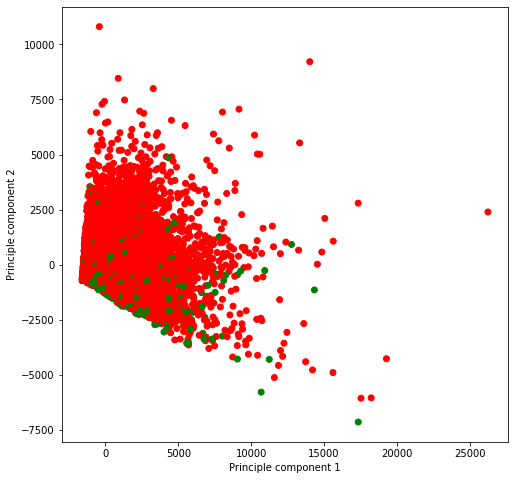

In [101]:
plt.figure(figsize=(8, 8))
plt.scatter(data_plot[:, 0], data_plot[:, 1], c= y.map({0: 'red', 1: 'green'}))
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.show()

In [102]:
data_high_4['Churn'] = y

<AxesSubplot:>

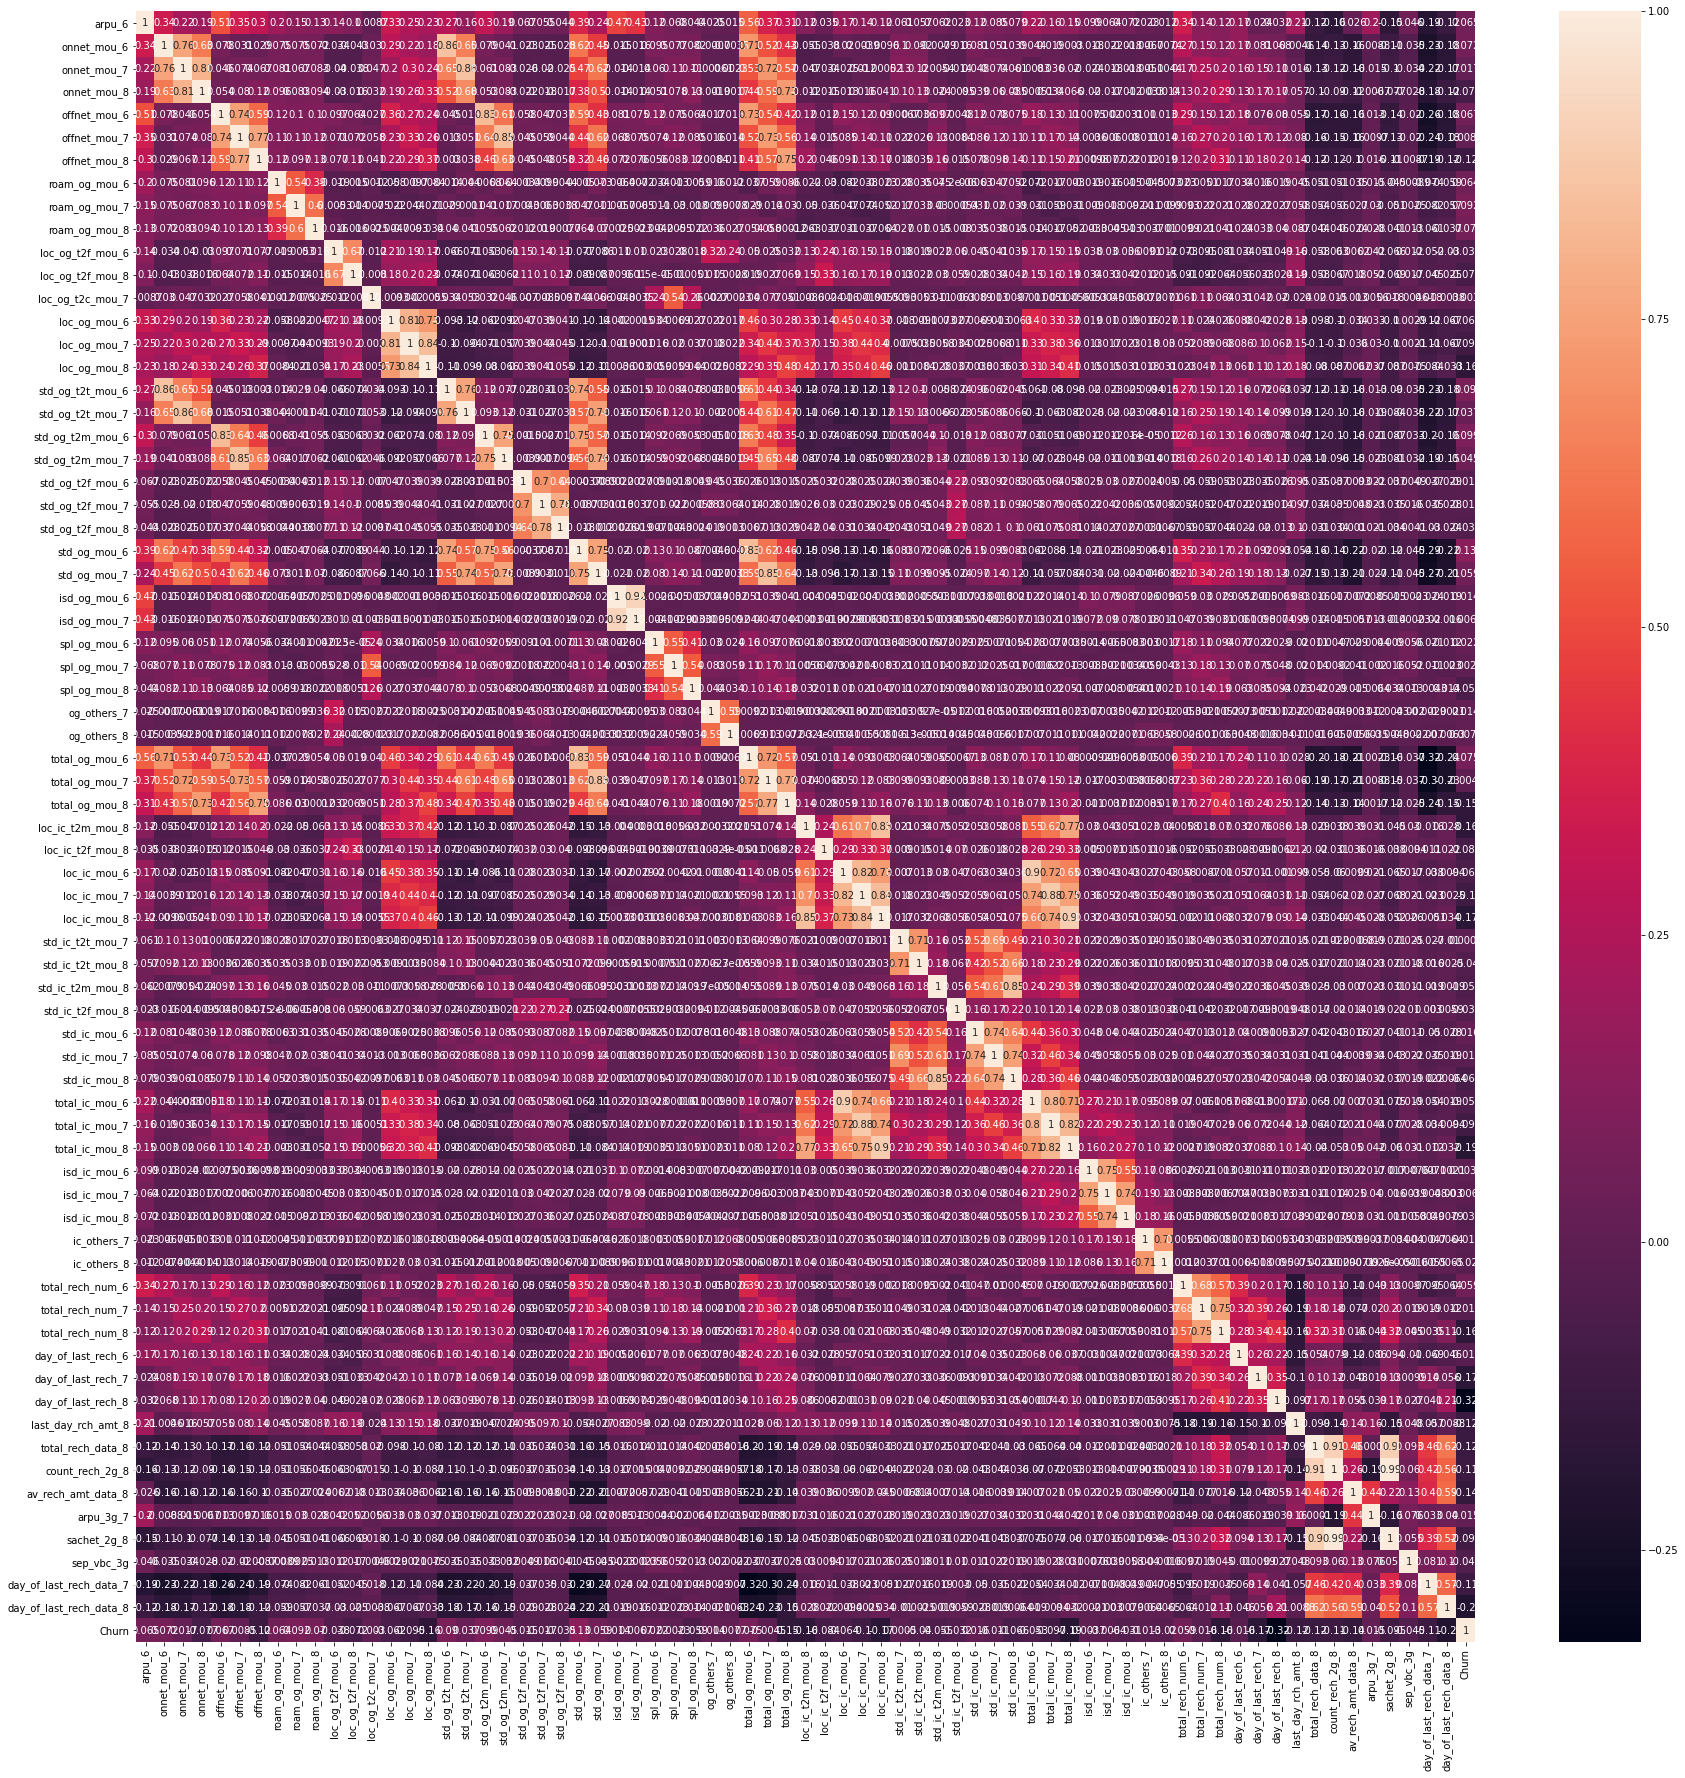

In [103]:
plt.figure(figsize=(30,30))
sns.heatmap(data_high_4.corr(),annot=True)

From above heatmap following points can be observed:
* High correlation mostly exists between the same variables for 3 months 
* In general the correlation between the variables is pretty low
* No single variable shows very high correlation with churn

It is expected that same variable recorded across 3 months will show high correlation. But in our case more than month-on-month values of the features the change in value from month-to-month will be more useful.

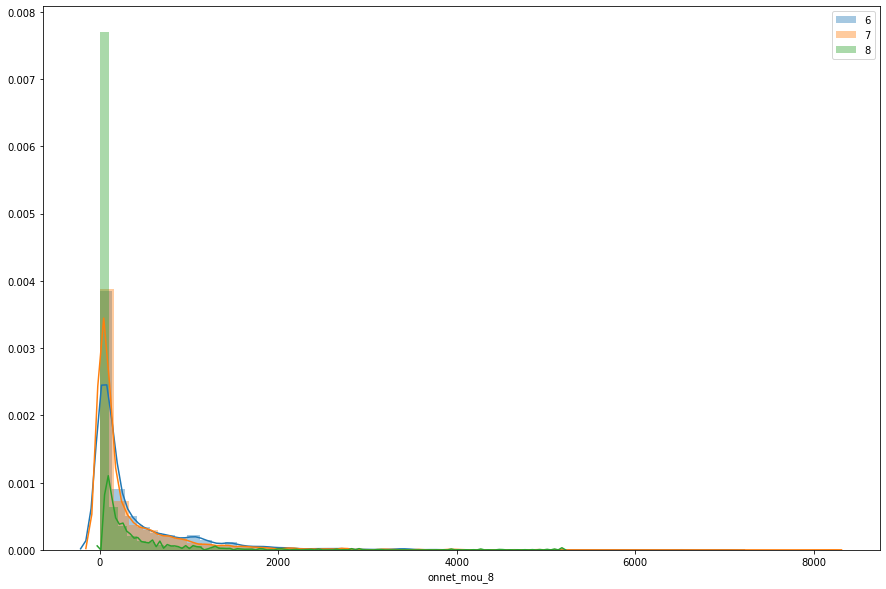

In [104]:
plt.figure(figsize=(15,10))
sns.distplot(data_high_4[data_high_4['Churn']==1]['onnet_mou_6'],label='6')
sns.distplot(data_high_4[data_high_4['Churn']==1]['onnet_mou_7'],label='7')
sns.distplot(data_high_4[data_high_4['Churn']==1]['onnet_mou_8'],label='8')
plt.legend()

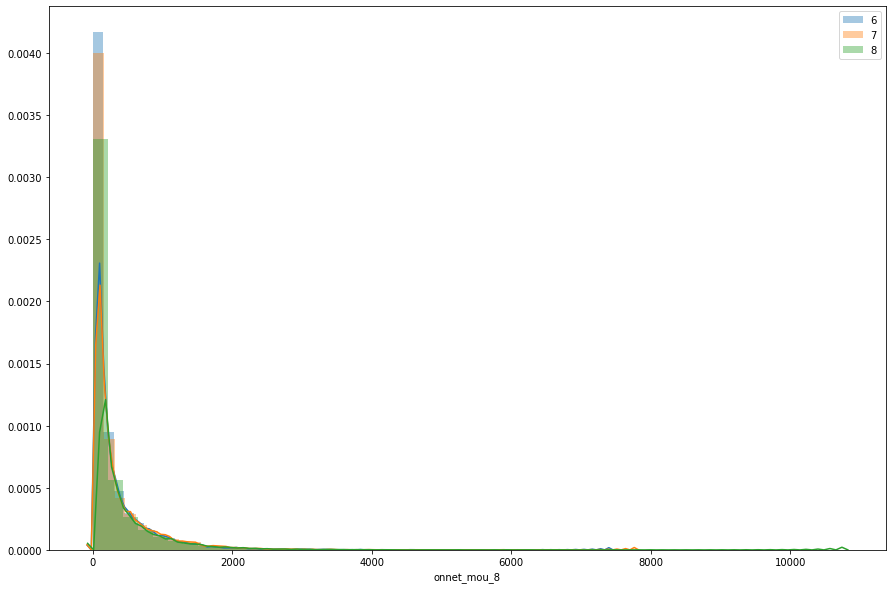

In [105]:
plt.figure(figsize=(15,10))
sns.distplot(data_high_4[data_high_4['Churn']==0]['onnet_mou_6'],label='6')
sns.distplot(data_high_4[data_high_4['Churn']==0]['onnet_mou_7'],label='7')
sns.distplot(data_high_4[data_high_4['Churn']==0]['onnet_mou_8'],label='8')
plt.legend()

Here we see that our intuition about the change in value from month to month being an important factor is visible.
* Among churn customer we see that the number of zero minutes of usage is much larger in 8 months than in 6 and 7, while number of higher minutes user is larger in 6,7 month than 8.
* Among non-churn users this trend is absent.

In [106]:
data_high_4.loc[:,:]['onnet_change_6_7'] = (data_high_4.loc[:,:]['onnet_mou_7'] - data_high_4.loc[:,:]['onnet_mou_6'])
data_high_4.loc[:,:]['onnet_change_7_8'] = (data_high_4.loc[:,:]['onnet_mou_8'] - data_high_4.loc[:,:]['onnet_mou_7'])
data_high_4.loc[:,:]['onnet_change_6_8'] = (data_high_4.loc[:,:]['onnet_mou_8'] - data_high_4.loc[:,:]['onnet_mou_6'])

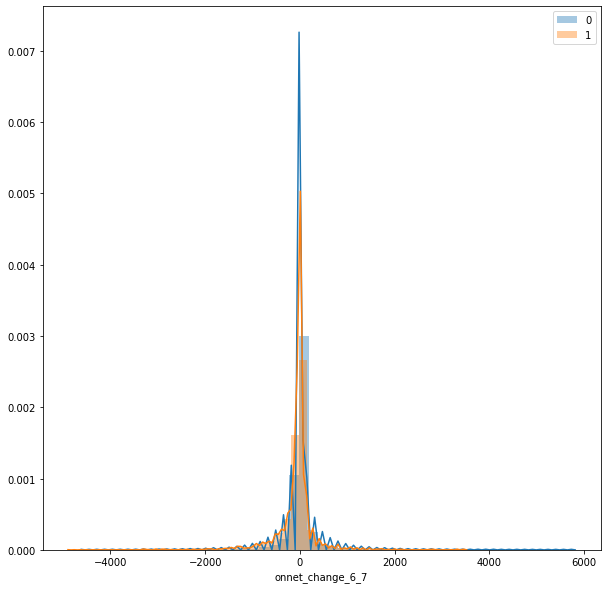

In [107]:
plt.figure(figsize=(10,10))
sns.distplot(data_high_4[data_high_4['Churn']==0]['onnet_change_6_7'],label='0')
sns.distplot(data_high_4[data_high_4['Churn']==1]['onnet_change_6_7'],label='1')
plt.legend()

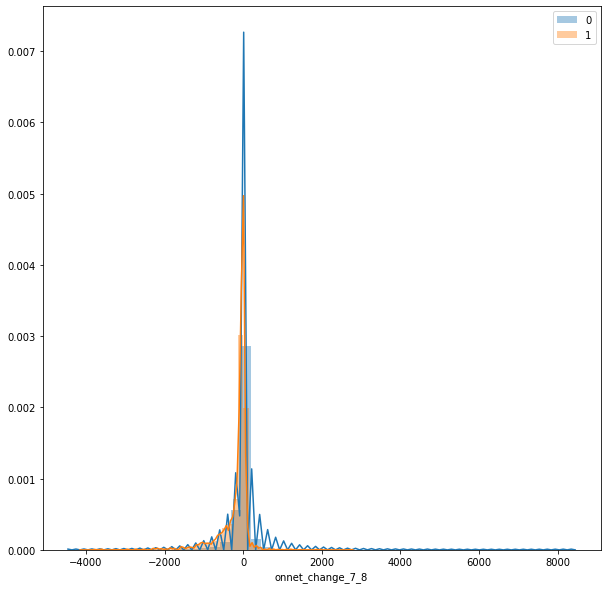

In [108]:
plt.figure(figsize=(10,10))
sns.distplot(data_high_4[data_high_4['Churn']==0]['onnet_change_7_8'],label='0')
sns.distplot(data_high_4[data_high_4['Churn']==1]['onnet_change_7_8'],label='1')
plt.legend()

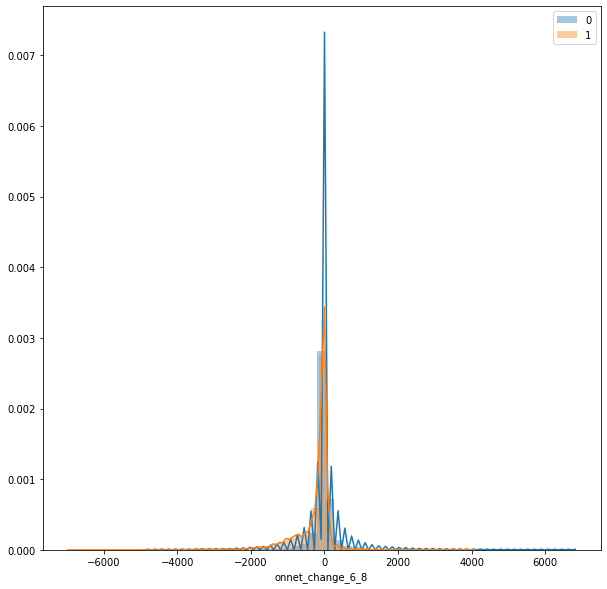

In [109]:
plt.figure(figsize=(10,10))
sns.distplot(data_high_4[data_high_4['Churn']==0]['onnet_change_6_8'],label='0')
sns.distplot(data_high_4[data_high_4['Churn']==1]['onnet_change_6_8'],label='1')
plt.legend()

We can see clearly that for 6-7 ,the plot of churn and non-churn are almost overlapping, but for 7-8 we see that no positive difference occurs in case of churn customers and same for 6-8.
So, we retain 7-8, but drop the other two.

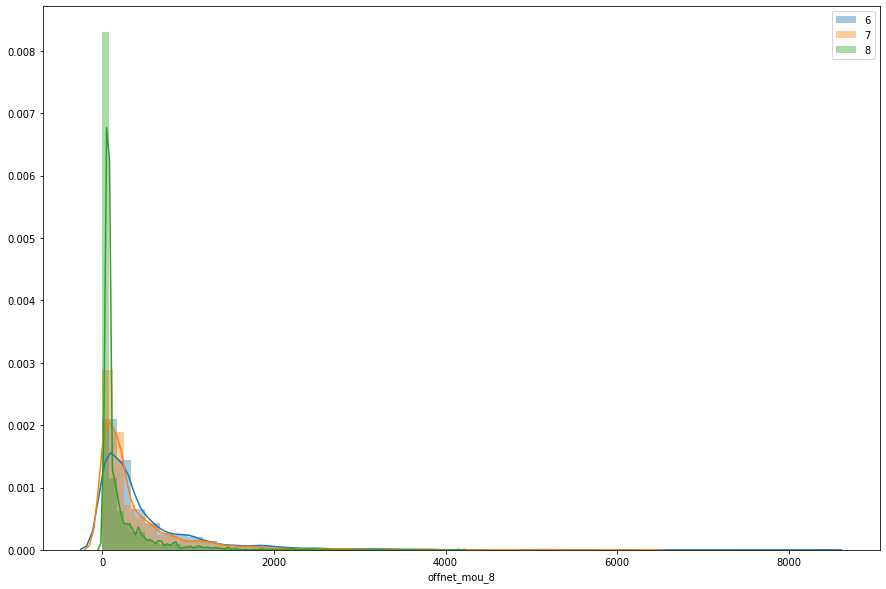

In [110]:
plt.figure(figsize=(15,10))
sns.distplot(data_high_4[data_high_4['Churn']==1]['offnet_mou_6'],label='6')
sns.distplot(data_high_4[data_high_4['Churn']==1]['offnet_mou_7'],label='7')
sns.distplot(data_high_4[data_high_4['Churn']==1]['offnet_mou_8'],label='8')
plt.legend()

In [111]:
data_high_4.columns

Index(['arpu_6', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6',
       'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
  

We see a similar trend here. So, we introduce the change from 7-8 as new variable. Similarly we introduce the similar variable for roam_og_mou, std_og_t2f_mou,total_og_mou,total_ic_mou,isd_ic_mou.

In [112]:
data_high_4.loc[:,:]['offnet_mou_change_7_8'] = data_high_4.loc[:,:]['offnet_mou_8'] - data_high_4.loc[:,:]['offnet_mou_7']
data_high_4.loc[:,:]['roam_og_mou_7_8'] = data_high_4.loc[:,:]['roam_og_mou_8'] - data_high_4.loc[:,:]['roam_og_mou_7']
data_high_4.loc[:,:]['std_og_t2f_mou_7_8'] = data_high_4.loc[:,:]['std_og_t2f_mou_8'] - data_high_4.loc[:,:]['std_og_t2f_mou_7']
data_high_4.loc[:,:]['total_og_mou_7_8'] = data_high_4.loc[:,:]['total_og_mou_8'] - data_high_4.loc[:,:]['total_og_mou_7']
data_high_4.loc[:,:]['total_ic_mou_7_8'] = data_high_4.loc[:,:]['total_ic_mou_8'] - data_high_4.loc[:,:]['total_ic_mou_7']
data_high_4.loc[:,:]['isd_ic_mou_7_8'] = data_high_4.loc[:,:]['isd_ic_mou_8'] - data_high_4.loc[:,:]['isd_ic_mou_7']


In [113]:
data_high_4.drop(['onnet_change_6_8','onnet_change_6_7'],axis=1,inplace=True)

In [114]:
data_high_4.describe()

,arpu_6,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,last_day_rch_amt_8,total_rech_data_8,count_rech_2g_8,av_rech_amt_data_8,arpu_3g_7,sachet_2g_8,sep_vbc_3g,day_of_last_rech_data_7,day_of_last_rech_data_8,Churn,onnet_change_7_8,offnet_mou_change_7_8,roam_og_mou_7_8,std_og_t2f_mou_7_8,total_og_mou_7_8,total_ic_mou_7_8,isd_ic_mou_7_8
count,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000
mean,565.093783,266.540904,273.436850,239.984686,381.671198,385.996524,342.519261,27.220330,20.553279,20.502512,6.422119,5.980612,1.913080,259.051422,260.381945,240.749229,168.966013,177.196030,183.078567,191.307084,1.815538,1.833944,1.597927,354.886092,371.207029,2.188547,2.112561,5.939021,7.245999,6.682378,0.044204,0.059336,620.837550,639.329099,561.885305,149.874240,14.748401,236.814070,240.315403,228.992493,15.765820,14.202083,28.567894,2.612871,47.808266,50.164907,45.403921,296.217717,303.505749,286.399946,10.891080,12.039692,11.134262,1.537987,1.253396,12.051478,11.905279,10.170354,26.596444,27.329578,26.466370,92.349700,1.632727,1.224450,120.368044,118.597060,1.068913,8.125377,11.940218,10.856075,0.083833,-33.452164,-43.477263,-0.050767,-0.236017,-77.443794,-17.105803,-0.905430
std,460.719723,461.697701,480.243863,460.292673,481.965029,498.266985,477.910862,117.836714,97.220678,106.249972,22.264337,19.654862,9.231768,379.358242,376.555142,364.090863,405.999337,421.210652,411.705852,435.961165,12.013708,13.007064,10.963850,610.680154,640.374475,46.546944,46.183414,17.783541,22.037098,20.534041,2.721518,3.370502,689.626232,714.916321,696.539948,216.715154,43.888078,316.258355,318.452791,310.775884,84.278702,71.977160,104.809198,20.176618,137.724341,149.908705,140.526325,366.847658,376.650787,364.028623,77.187136,80.926668,71.244983,16.254819,12.969718,9.426114,9.435927,9.275342,4.537245,4.625839,5.880454,140.976421,3.006054,2.542346,190.374313,169.316495,2.541860,52.622468,12.239221,11.962601,0.277142,294.211297,334.132137,91.192965,8.095011,476.229067,222.720814,55.987532
min,-810.661000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

Another important aspect to check is how the incoming and outgoing call ratio changes with month.

In [115]:
data_high_4['incoming_outgoing_6'] = data_high_4['total_ic_mou_6']/(1+data_high_4['total_og_mou_6'])
data_high_4['incoming_outgoing_7'] = data_high_4['total_ic_mou_7']/(1+data_high_4['total_og_mou_7'])
data_high_4['incoming_outgoing_8'] = data_high_4['total_ic_mou_8']/(1+data_high_4['total_og_mou_8'])

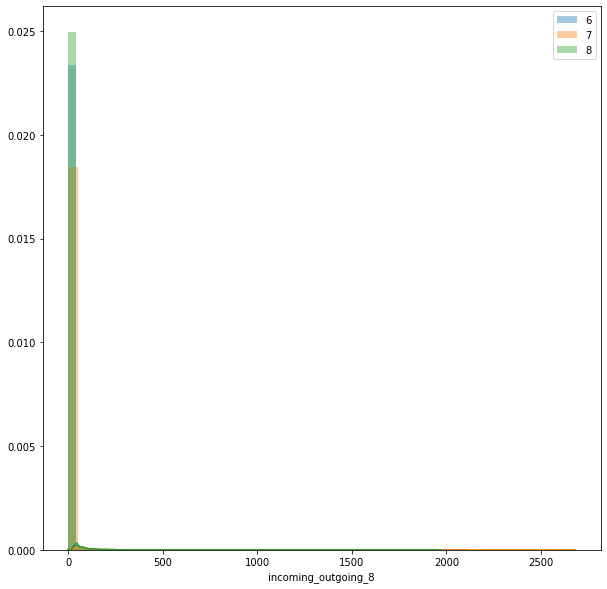

In [116]:
plt.figure(figsize=(10,10))
sns.distplot(data_high_4['incoming_outgoing_6'],label='6')
sns.distplot(data_high_4['incoming_outgoing_7'],label='7')
sns.distplot(data_high_4['incoming_outgoing_8'],label='8')
plt.legend()

In [117]:
data_high_4[['total_ic_mou_6','total_og_mou_6']].corr()

,total_ic_mou_6,total_og_mou_6
total_ic_mou_6,1.00000,0.16999
total_og_mou_6,0.16999,1.00000


We don't see any noticable differentiation. But one point to note is that number of lower values are much higher in month 8.

Let us look at the effect in case of churn and no-churn.

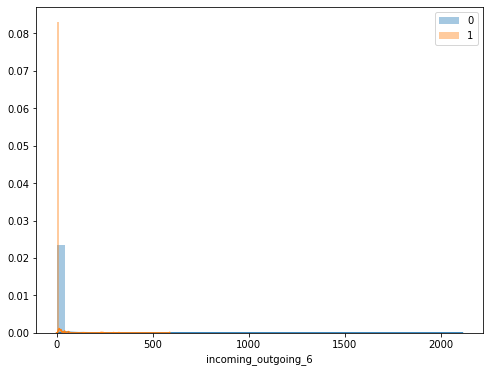

In [118]:
plt.figure(figsize=(8,6))
sns.distplot(data_high_4[data_high_4['Churn']==0]['incoming_outgoing_6'],label='0')
sns.distplot(data_high_4[data_high_4['Churn']==1]['incoming_outgoing_6'],label='1')
plt.legend()

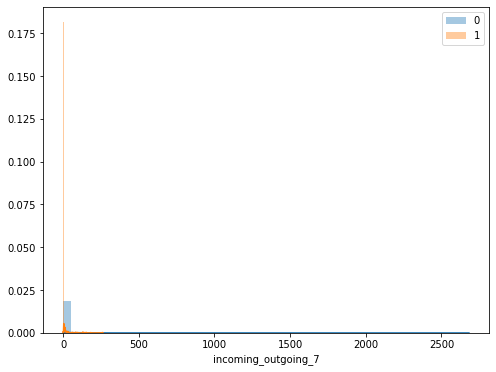

In [119]:
plt.figure(figsize=(8,6))
sns.distplot(data_high_4[data_high_4['Churn']==0]['incoming_outgoing_7'],label='0')
sns.distplot(data_high_4[data_high_4['Churn']==1]['incoming_outgoing_7'],label='1')
plt.legend()

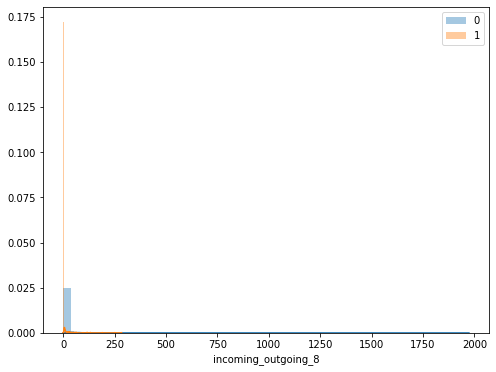

In [120]:
plt.figure(figsize=(8,6))
sns.distplot(data_high_4[data_high_4['Churn']==0]['incoming_outgoing_8'],label='0')
sns.distplot(data_high_4[data_high_4['Churn']==1]['incoming_outgoing_8'],label='1')
plt.legend()

In [121]:
data_high_4[data_high_4['Churn']==0]['incoming_outgoing_8'].value_counts().head()
data_high_4[data_high_4['Churn']==1]['incoming_outgoing_8'].value_counts().head()

0.000000    1314
0.330000       2
2.219512       2
0.205939       1
0.751324       1
Name: incoming_outgoing_8, dtype: int64

In [122]:
data_high_4[['incoming_outgoing_6','incoming_outgoing_7','incoming_outgoing_8']].corr()

,incoming_outgoing_6,incoming_outgoing_7,incoming_outgoing_8
incoming_outgoing_6,1.000000,0.531101,0.226835
incoming_outgoing_7,0.531101,1.000000,0.400861
incoming_outgoing_8,0.226835,0.400861,1.000000


We see from above that for churn case most values are in the lower end while for non-churn it is at the higher end. But it doesn't seem to be much useful.

In [123]:
data_high_4.drop(['incoming_outgoing_6','incoming_outgoing_7','incoming_outgoing_8'],axis=1,inplace=True)

In [124]:
corr_df = data_high_4.corr().loc['Churn',:].reset_index()
print(corr_df.head())

          index     Churn
0        arpu_6  0.064749
1   onnet_mou_6  0.072394
2   onnet_mou_7  0.017467
3   onnet_mou_8 -0.076931
4  offnet_mou_6  0.067425


In [125]:
train, test = train_test_split(data_high_4,train_size=0.8,random_state=100,stratify=data_high_4['Churn'])

We see that the newly introduced columns are having much more correlation with churn than the old columns. Now the major task is to build the model. Now as our focus is to find the KPIs we will use logistic regression. So, we need to remove multicolinearity.

In [126]:
def get_vif(x_train_sm):
    vif = pd.DataFrame()
    vif['features'] = x_train_sm.columns
    vif['VIF'] = [VIF(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.merge(corr_df,left_on='features',right_on='index',how='left')
    print(vif.sort_values(['VIF','Churn'],ascending=False))

In [127]:
model = LogisticRegression()
rfe = RFE(model, 20)
rfe = rfe.fit(train.drop('Churn',axis=1),train['Churn'] )

In [128]:
X_train = train.drop('Churn',axis=1).loc[:,rfe.support_]
y_train = train['Churn']
X_test = test.drop('Churn',axis=1).loc[:,rfe.support_]
y_test = test['Churn']

In [129]:
get_vif(X_train)

                   features    VIF                    index     Churn
7             roam_og_mou_7    inf            roam_og_mou_7  0.092181
8             roam_og_mou_8    inf            roam_og_mou_8  0.069838
1               onnet_mou_7    inf              onnet_mou_7  0.017467
4              offnet_mou_7    inf             offnet_mou_7  0.008452
9            total_og_mou_7    inf           total_og_mou_7 -0.004470
18          roam_og_mou_7_8    inf          roam_og_mou_7_8 -0.016905
2               onnet_mou_8    inf              onnet_mou_8 -0.076931
5              offnet_mou_8    inf             offnet_mou_8 -0.115372
16         onnet_change_7_8    inf         onnet_change_7_8 -0.148869
10           total_og_mou_8    inf           total_og_mou_8 -0.152910
17    offnet_mou_change_7_8    inf    offnet_mou_change_7_8 -0.177621
19         total_og_mou_7_8    inf         total_og_mou_7_8 -0.216938
13       day_of_last_rech_8  22.33       day_of_last_rech_8 -0.324502
12       day_of_last

In [130]:
def model(X_train,y_train):
    scaler = StandardScaler()
    X= scaler.fit_transform(X_train)
    X_sm = sm.add_constant(X)
    log_reg = Logit(y_train,X_sm).fit()
    cols = dict(zip(range(1,len(X_train)+1),list(X_train.columns)))
    print(log_reg.summary())
    print('\n')
    print(cols)
def drop(col_name,X_train):
    try:
        X_train.drop(col_name,axis=1,inplace=True)
    except Exception as e:
        print('Column not selected in this itteration by rfe')
model(X_train,y_train)

Optimization terminated successfully.
         Current function value: 0.167127
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                23217
Model:                          Logit   Df Residuals:                    23200
Method:                           MLE   Df Model:                           16
Date:                Mon, 28 Sep 2020   Pseudo R-squ.:                  0.4197
Time:                        21:08:15   Log-Likelihood:                -3880.2
converged:                       True   LL-Null:                       -6686.4
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9729      0.118    -33.684      0.000      -4.204      -3.742
x1             0.2141      0

In [131]:
X_train.drop('roam_og_mou_7',axis=1,inplace=True)

In [132]:
get_vif(X_train)

                   features    VIF                    index     Churn
1               onnet_mou_7    inf              onnet_mou_7  0.017467
4              offnet_mou_7    inf             offnet_mou_7  0.008452
8            total_og_mou_7    inf           total_og_mou_7 -0.004470
2               onnet_mou_8    inf              onnet_mou_8 -0.076931
5              offnet_mou_8    inf             offnet_mou_8 -0.115372
15         onnet_change_7_8    inf         onnet_change_7_8 -0.148869
9            total_og_mou_8    inf           total_og_mou_8 -0.152910
16    offnet_mou_change_7_8    inf    offnet_mou_change_7_8 -0.177621
18         total_og_mou_7_8    inf         total_og_mou_7_8 -0.216938
7             roam_og_mou_8  34.63            roam_og_mou_8  0.069838
12       day_of_last_rech_8  22.33       day_of_last_rech_8 -0.324502
11       day_of_last_rech_7  21.17       day_of_last_rech_7 -0.166854
17          roam_og_mou_7_8  15.46          roam_og_mou_7_8 -0.016905
3              offne

In [133]:
model(X_train,y_train)

Optimization terminated successfully.
         Current function value: 0.167127
         Iterations 26
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                23217
Model:                          Logit   Df Residuals:                    23200
Method:                           MLE   Df Model:                           16
Date:                Mon, 28 Sep 2020   Pseudo R-squ.:                  0.4197
Time:                        21:08:18   Log-Likelihood:                -3880.2
converged:                       True   LL-Null:                       -6686.4
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9729      0.118    -33.684      0.000      -4.204      -3.742
x1             0.2141      0

In [134]:
drop('onnet_mou_7',X_train)

In [135]:
get_vif(X_train)

                   features     VIF                    index     Churn
3              offnet_mou_7     inf             offnet_mou_7  0.008452
7            total_og_mou_7     inf           total_og_mou_7 -0.004470
4              offnet_mou_8     inf             offnet_mou_8 -0.115372
8            total_og_mou_8     inf           total_og_mou_8 -0.152910
15    offnet_mou_change_7_8     inf    offnet_mou_change_7_8 -0.177621
17         total_og_mou_7_8     inf         total_og_mou_7_8 -0.216938
1               onnet_mou_8  724.18              onnet_mou_8 -0.076931
14         onnet_change_7_8  139.13         onnet_change_7_8 -0.148869
6             roam_og_mou_8   34.63            roam_og_mou_8  0.069838
11       day_of_last_rech_8   22.33       day_of_last_rech_8 -0.324502
10       day_of_last_rech_7   21.17       day_of_last_rech_7 -0.166854
16          roam_og_mou_7_8   15.46          roam_og_mou_7_8 -0.016905
2              offnet_mou_6    3.76             offnet_mou_6  0.067425
0     

In [136]:
model(X_train,y_train)

Optimization terminated successfully.
         Current function value: 0.167127
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                23217
Model:                          Logit   Df Residuals:                    23200
Method:                           MLE   Df Model:                           16
Date:                Mon, 28 Sep 2020   Pseudo R-squ.:                  0.4197
Time:                        21:08:23   Log-Likelihood:                -3880.2
converged:                       True   LL-Null:                       -6686.4
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9729      0.118    -33.684      0.000      -4.204      -3.742
x1             0.2141      0

In [137]:
drop('total_og_mou_7',X_train)

In [138]:
get_vif(X_train)

                   features      VIF                    index     Churn
3              offnet_mou_7      inf             offnet_mou_7  0.008452
4              offnet_mou_8      inf             offnet_mou_8 -0.115372
14    offnet_mou_change_7_8      inf    offnet_mou_change_7_8 -0.177621
7            total_og_mou_8  2169.03           total_og_mou_8 -0.152910
1               onnet_mou_8   724.18              onnet_mou_8 -0.076931
16         total_og_mou_7_8   367.83         total_og_mou_7_8 -0.216938
13         onnet_change_7_8   139.13         onnet_change_7_8 -0.148869
6             roam_og_mou_8    34.63            roam_og_mou_8  0.069838
10       day_of_last_rech_8    22.33       day_of_last_rech_8 -0.324502
9        day_of_last_rech_7    21.17       day_of_last_rech_7 -0.166854
15          roam_og_mou_7_8    15.46          roam_og_mou_7_8 -0.016905
2              offnet_mou_6     3.76             offnet_mou_6  0.067425
0               onnet_mou_6     3.21              onnet_mou_6  0

In [139]:
model(X_train,y_train)

Optimization terminated successfully.
         Current function value: 0.167127
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                23217
Model:                          Logit   Df Residuals:                    23200
Method:                           MLE   Df Model:                           16
Date:                Mon, 28 Sep 2020   Pseudo R-squ.:                  0.4197
Time:                        21:08:25   Log-Likelihood:                -3880.2
converged:                       True   LL-Null:                       -6686.4
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9729      0.118    -33.684      0.000      -4.204      -3.742
x1             0.2141      0

In [140]:
drop('offnet_mou_7',X_train)

In [141]:
get_vif(X_train)

                   features      VIF                    index     Churn
6            total_og_mou_8  2169.03           total_og_mou_8 -0.152910
3              offnet_mou_8   970.44             offnet_mou_8 -0.115372
1               onnet_mou_8   724.18              onnet_mou_8 -0.076931
15         total_og_mou_7_8   367.83         total_og_mou_7_8 -0.216938
13    offnet_mou_change_7_8   186.42    offnet_mou_change_7_8 -0.177621
12         onnet_change_7_8   139.13         onnet_change_7_8 -0.148869
5             roam_og_mou_8    34.63            roam_og_mou_8  0.069838
9        day_of_last_rech_8    22.33       day_of_last_rech_8 -0.324502
8        day_of_last_rech_7    21.17       day_of_last_rech_7 -0.166854
14          roam_og_mou_7_8    15.46          roam_og_mou_7_8 -0.016905
2              offnet_mou_6     3.76             offnet_mou_6  0.067425
0               onnet_mou_6     3.21              onnet_mou_6  0.072394
11  day_of_last_rech_data_8     2.12  day_of_last_rech_data_8 -0

In [142]:
model(X_train,y_train)

Optimization terminated successfully.
         Current function value: 0.167127
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                23217
Model:                          Logit   Df Residuals:                    23200
Method:                           MLE   Df Model:                           16
Date:                Mon, 28 Sep 2020   Pseudo R-squ.:                  0.4197
Time:                        21:08:27   Log-Likelihood:                -3880.2
converged:                       True   LL-Null:                       -6686.4
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9729      0.118    -33.684      0.000      -4.204      -3.742
x1             0.2141      0

In [143]:
drop('day_of_last_rech_7',X_train)

In [144]:
get_vif(X_train)

                   features      VIF                    index     Churn
6            total_og_mou_8  2139.59           total_og_mou_8 -0.152910
3              offnet_mou_8   956.45             offnet_mou_8 -0.115372
1               onnet_mou_8   713.99              onnet_mou_8 -0.076931
14         total_og_mou_7_8   367.77         total_og_mou_7_8 -0.216938
12    offnet_mou_change_7_8   186.32    offnet_mou_change_7_8 -0.177621
11         onnet_change_7_8   139.06         onnet_change_7_8 -0.148869
5             roam_og_mou_8    34.18            roam_og_mou_8  0.069838
13          roam_og_mou_7_8    15.45          roam_og_mou_7_8 -0.016905
8        day_of_last_rech_8     3.96       day_of_last_rech_8 -0.324502
2              offnet_mou_6     3.76             offnet_mou_6  0.067425
0               onnet_mou_6     3.21              onnet_mou_6  0.072394
10  day_of_last_rech_data_8     2.11  day_of_last_rech_data_8 -0.201351
4             roam_og_mou_6     1.56            roam_og_mou_6  0

In [145]:
model(X_train,y_train)

Optimization terminated successfully.
         Current function value: 0.167198
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                23217
Model:                          Logit   Df Residuals:                    23201
Method:                           MLE   Df Model:                           15
Date:                Mon, 28 Sep 2020   Pseudo R-squ.:                  0.4194
Time:                        21:08:28   Log-Likelihood:                -3881.8
converged:                       True   LL-Null:                       -6686.4
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9753      0.118    -33.625      0.000      -4.207      -3.744
x1             0.2109      0

In [146]:
drop('roam_og_mou_7_8',X_train)

In [147]:
get_vif(X_train)

                   features      VIF                    index     Churn
6            total_og_mou_8  2044.36           total_og_mou_8 -0.152910
3              offnet_mou_8   914.28             offnet_mou_8 -0.115372
1               onnet_mou_8   682.94              onnet_mou_8 -0.076931
13         total_og_mou_7_8    41.30         total_og_mou_7_8 -0.216938
5             roam_og_mou_8    31.93            roam_og_mou_8  0.069838
12    offnet_mou_change_7_8    22.20    offnet_mou_change_7_8 -0.177621
11         onnet_change_7_8    17.24         onnet_change_7_8 -0.148869
8        day_of_last_rech_8     3.95       day_of_last_rech_8 -0.324502
2              offnet_mou_6     3.76             offnet_mou_6  0.067425
0               onnet_mou_6     3.20              onnet_mou_6  0.072394
10  day_of_last_rech_data_8     2.11  day_of_last_rech_data_8 -0.201351
4             roam_og_mou_6     1.53            roam_og_mou_6  0.063521
7          loc_ic_t2f_mou_8     1.11         loc_ic_t2f_mou_8 -0

In [148]:
model(X_train,y_train)

Optimization terminated successfully.
         Current function value: 0.167335
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                23217
Model:                          Logit   Df Residuals:                    23202
Method:                           MLE   Df Model:                           14
Date:                Mon, 28 Sep 2020   Pseudo R-squ.:                  0.4190
Time:                        21:08:29   Log-Likelihood:                -3885.0
converged:                       True   LL-Null:                       -6686.4
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9728      0.118    -33.638      0.000      -4.204      -3.741
x1             0.2100      0

In [149]:
drop('sep_vbc_3g',X_train)

In [150]:
get_vif(X_train)

                   features      VIF                    index     Churn
6            total_og_mou_8  2044.17           total_og_mou_8 -0.152910
3              offnet_mou_8   914.19             offnet_mou_8 -0.115372
1               onnet_mou_8   682.87              onnet_mou_8 -0.076931
12         total_og_mou_7_8    41.30         total_og_mou_7_8 -0.216938
5             roam_og_mou_8    31.92            roam_og_mou_8  0.069838
11    offnet_mou_change_7_8    22.20    offnet_mou_change_7_8 -0.177621
10         onnet_change_7_8    17.24         onnet_change_7_8 -0.148869
8        day_of_last_rech_8     3.95       day_of_last_rech_8 -0.324502
2              offnet_mou_6     3.76             offnet_mou_6  0.067425
0               onnet_mou_6     3.20              onnet_mou_6  0.072394
9   day_of_last_rech_data_8     2.09  day_of_last_rech_data_8 -0.201351
4             roam_og_mou_6     1.53            roam_og_mou_6  0.063521
7          loc_ic_t2f_mou_8     1.11         loc_ic_t2f_mou_8 -0

In [151]:
model(X_train,y_train)

Optimization terminated successfully.
         Current function value: 0.169108
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                23217
Model:                          Logit   Df Residuals:                    23203
Method:                           MLE   Df Model:                           13
Date:                Mon, 28 Sep 2020   Pseudo R-squ.:                  0.4128
Time:                        21:08:30   Log-Likelihood:                -3926.2
converged:                       True   LL-Null:                       -6686.4
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5777      0.055    -64.599      0.000      -3.686      -3.469
x1             0.2162      0.

In [152]:
drop('total_og_mou_6',X_train)

Column not selected in this itteration by rfe


In [153]:
get_vif(X_train)

                   features      VIF                    index     Churn
6            total_og_mou_8  2044.17           total_og_mou_8 -0.152910
3              offnet_mou_8   914.19             offnet_mou_8 -0.115372
1               onnet_mou_8   682.87              onnet_mou_8 -0.076931
12         total_og_mou_7_8    41.30         total_og_mou_7_8 -0.216938
5             roam_og_mou_8    31.92            roam_og_mou_8  0.069838
11    offnet_mou_change_7_8    22.20    offnet_mou_change_7_8 -0.177621
10         onnet_change_7_8    17.24         onnet_change_7_8 -0.148869
8        day_of_last_rech_8     3.95       day_of_last_rech_8 -0.324502
2              offnet_mou_6     3.76             offnet_mou_6  0.067425
0               onnet_mou_6     3.20              onnet_mou_6  0.072394
9   day_of_last_rech_data_8     2.09  day_of_last_rech_data_8 -0.201351
4             roam_og_mou_6     1.53            roam_og_mou_6  0.063521
7          loc_ic_t2f_mou_8     1.11         loc_ic_t2f_mou_8 -0

In [154]:
model(X_train,y_train)

Optimization terminated successfully.
         Current function value: 0.169108
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                23217
Model:                          Logit   Df Residuals:                    23203
Method:                           MLE   Df Model:                           13
Date:                Mon, 28 Sep 2020   Pseudo R-squ.:                  0.4128
Time:                        21:08:31   Log-Likelihood:                -3926.2
converged:                       True   LL-Null:                       -6686.4
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5777      0.055    -64.599      0.000      -3.686      -3.469
x1             0.2162      0.

In [155]:
drop('roam_og_mou_6',X_train)

In [156]:
get_vif(X_train)

                   features      VIF                    index     Churn
5            total_og_mou_8  2035.21           total_og_mou_8 -0.152910
3              offnet_mou_8   910.04             offnet_mou_8 -0.115372
1               onnet_mou_8   679.72              onnet_mou_8 -0.076931
11         total_og_mou_7_8    33.98         total_og_mou_7_8 -0.216938
4             roam_og_mou_8    31.78            roam_og_mou_8  0.069838
10    offnet_mou_change_7_8    18.59    offnet_mou_change_7_8 -0.177621
9          onnet_change_7_8    14.50         onnet_change_7_8 -0.148869
7        day_of_last_rech_8     3.94       day_of_last_rech_8 -0.324502
2              offnet_mou_6     3.76             offnet_mou_6  0.067425
0               onnet_mou_6     3.20              onnet_mou_6  0.072394
8   day_of_last_rech_data_8     2.09  day_of_last_rech_data_8 -0.201351
6          loc_ic_t2f_mou_8     1.11         loc_ic_t2f_mou_8 -0.084053


In [157]:
model(X_train,y_train)

Optimization terminated successfully.
         Current function value: 0.169126
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                23217
Model:                          Logit   Df Residuals:                    23204
Method:                           MLE   Df Model:                           12
Date:                Mon, 28 Sep 2020   Pseudo R-squ.:                  0.4127
Time:                        21:08:33   Log-Likelihood:                -3926.6
converged:                       True   LL-Null:                       -6686.4
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5763      0.055    -64.632      0.000      -3.685      -3.468
x1             0.2159      0.

In [158]:
drop('offnet_mou_6',X_train)

In [159]:
get_vif(X_train)

                   features      VIF                    index     Churn
4            total_og_mou_8  2024.08           total_og_mou_8 -0.152910
2              offnet_mou_8   897.37             offnet_mou_8 -0.115372
1               onnet_mou_8   676.77              onnet_mou_8 -0.076931
10         total_og_mou_7_8    33.96         total_og_mou_7_8 -0.216938
3             roam_og_mou_8    31.64            roam_og_mou_8  0.069838
9     offnet_mou_change_7_8    17.87    offnet_mou_change_7_8 -0.177621
8          onnet_change_7_8    14.50         onnet_change_7_8 -0.148869
6        day_of_last_rech_8     3.82       day_of_last_rech_8 -0.324502
0               onnet_mou_6     3.14              onnet_mou_6  0.072394
7   day_of_last_rech_data_8     2.09  day_of_last_rech_data_8 -0.201351
5          loc_ic_t2f_mou_8     1.11         loc_ic_t2f_mou_8 -0.084053


In [160]:
model(X_train,y_train)

Optimization terminated successfully.
         Current function value: 0.169734
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                23217
Model:                          Logit   Df Residuals:                    23205
Method:                           MLE   Df Model:                           11
Date:                Mon, 28 Sep 2020   Pseudo R-squ.:                  0.4106
Time:                        21:08:35   Log-Likelihood:                -3940.7
converged:                       True   LL-Null:                       -6686.4
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5792      0.056    -64.464      0.000      -3.688      -3.470
x1             0.2400      0.

In [161]:
drop('offnet_mou_8',X_train)

In [162]:
get_vif(X_train)

                  features    VIF                    index     Churn
9         total_og_mou_7_8  33.79         total_og_mou_7_8 -0.216938
8    offnet_mou_change_7_8  17.81    offnet_mou_change_7_8 -0.177621
7         onnet_change_7_8  14.43         onnet_change_7_8 -0.148869
1              onnet_mou_8   4.64              onnet_mou_8 -0.076931
3           total_og_mou_8   4.09           total_og_mou_8 -0.152910
5       day_of_last_rech_8   3.81       day_of_last_rech_8 -0.324502
0              onnet_mou_6   3.13              onnet_mou_6  0.072394
6  day_of_last_rech_data_8   2.08  day_of_last_rech_data_8 -0.201351
2            roam_og_mou_8   1.44            roam_og_mou_8  0.069838
4         loc_ic_t2f_mou_8   1.11         loc_ic_t2f_mou_8 -0.084053


In [163]:
model(X_train,y_train)

Optimization terminated successfully.
         Current function value: 0.197948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                23217
Model:                          Logit   Df Residuals:                    23206
Method:                           MLE   Df Model:                           10
Date:                Mon, 28 Sep 2020   Pseudo R-squ.:                  0.3127
Time:                        21:08:37   Log-Likelihood:                -4595.8
converged:                       True   LL-Null:                       -6686.4
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7993      0.062    -61.760      0.000      -3.920      -3.679
x1             0.2528      0

In [164]:
drop('total_og_mou_7_8',X_train)

In [165]:
get_vif(X_train)

                  features   VIF                    index     Churn
1              onnet_mou_8  4.64              onnet_mou_8 -0.076931
3           total_og_mou_8  4.08           total_og_mou_8 -0.152910
5       day_of_last_rech_8  3.80       day_of_last_rech_8 -0.324502
0              onnet_mou_6  3.13              onnet_mou_6  0.072394
6  day_of_last_rech_data_8  2.08  day_of_last_rech_data_8 -0.201351
7         onnet_change_7_8  1.57         onnet_change_7_8 -0.148869
8    offnet_mou_change_7_8  1.13    offnet_mou_change_7_8 -0.177621
4         loc_ic_t2f_mou_8  1.11         loc_ic_t2f_mou_8 -0.084053
2            roam_og_mou_8  1.06            roam_og_mou_8  0.069838


In [166]:
model(X_train,y_train)

Optimization terminated successfully.
         Current function value: 0.198160
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                23217
Model:                          Logit   Df Residuals:                    23207
Method:                           MLE   Df Model:                            9
Date:                Mon, 28 Sep 2020   Pseudo R-squ.:                  0.3119
Time:                        21:08:38   Log-Likelihood:                -4600.7
converged:                       True   LL-Null:                       -6686.4
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8019      0.062    -61.730      0.000      -3.923      -3.681
x1             0.2558      0

In [167]:
drop('onnet_mou_6',X_train)

In [168]:
get_vif(X_train)

                  features   VIF                    index     Churn
2           total_og_mou_8  4.07           total_og_mou_8 -0.152910
4       day_of_last_rech_8  3.67       day_of_last_rech_8 -0.324502
0              onnet_mou_8  2.89              onnet_mou_8 -0.076931
5  day_of_last_rech_data_8  2.06  day_of_last_rech_data_8 -0.201351
7    offnet_mou_change_7_8  1.13    offnet_mou_change_7_8 -0.177621
3         loc_ic_t2f_mou_8  1.11         loc_ic_t2f_mou_8 -0.084053
6         onnet_change_7_8  1.10         onnet_change_7_8 -0.148869
1            roam_og_mou_8  1.06            roam_og_mou_8  0.069838


In [169]:
model(X_train,y_train)

Optimization terminated successfully.
         Current function value: 0.199305
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                23217
Model:                          Logit   Df Residuals:                    23208
Method:                           MLE   Df Model:                            8
Date:                Mon, 28 Sep 2020   Pseudo R-squ.:                  0.3080
Time:                        21:08:43   Log-Likelihood:                -4627.3
converged:                       True   LL-Null:                       -6686.4
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8155      0.062    -61.450      0.000      -3.937      -3.694
x1             0.5460      0

In [170]:
model = LogisticRegression().fit(X_train,y_train)

In [171]:
X_test_2 = X_test[list(X_train.columns)]

In [172]:
pred_y_test = model.predict(X_test_2)

#### In churn analysis the main objective is to identify all churn customers correctly. And it is okay if some people are marked wrongly as churn. So we select recall as our metric.
                         Recall = (True_Positive)/(True_Positive+False_Negative)

In [173]:
print('recall of model for test',recall_score(y_test,pred_y_test))

recall of model for test 0.23408624229979466


In [174]:
y_test.head()

75407    0.0
82184    0.0
64919    0.0
46703    0.0
35659    0.0
Name: Churn, dtype: float64

In [175]:
len(test[test['Churn']==1])/len(test)

0.0838931955211025

* We see that a random model will have a 8.39% recall, and our model has 23.33% recall. Now, one improvement can be to handle class imbalance while training.
* We handle class imbalance by doing undersampling 

In [176]:
y_train.value_counts()

0.0    21271
1.0     1946
Name: Churn, dtype: int64

In [177]:
train_cv = X_train.loc[:,:]
train_cv['Churn'] = y_train
train_c = train_cv[train_cv['Churn']==1].reset_index().drop('index',axis=1)
train_nc = train_cv[train_cv['Churn']==0].reset_index().drop('index',axis=1)

In [178]:
train_c.columns

Index(['onnet_mou_8', 'roam_og_mou_8', 'total_og_mou_8', 'loc_ic_t2f_mou_8',
       'day_of_last_rech_8', 'day_of_last_rech_data_8', 'onnet_change_7_8',
       'offnet_mou_change_7_8', 'Churn'],
      dtype='object')

The approach for bootstarp undersampling is as follows:
1. We select 1900 non-churn and 1900 churn customers with replacement (bootstrap sampling)
2. We create a merged traing set of 3800 and train on this set
3. We predict for the test set created originally and calculate the recall ( number of label 1's correctly predicted)
4. We repeat this for 1000 iterations to get confidence interval of our model

In [179]:
recall = []
precision = []
n_iter = 1000
train_size = 1000
c_index = len(train_c)
nc_index = len(train_nc)
models = []
rec_max = 0 
for i in range(n_iter):
    array_c = np.random.randint(0,c_index,train_size)
    array_nc = np.random.randint(0,nc_index,train_size)
    train_s_c = train_c.iloc[array_c,:]
    train_s_nc = train_nc.iloc[array_nc,:]
    train_all = pd.concat([train_s_c,train_s_nc],ignore_index=True)
    X = train_all.drop('Churn',axis=1)
    y = train_all['Churn']
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    model = LogisticRegression().fit(X,y)
    X_test_3 = scaler.transform(X_test_2)
    y_pred = model.predict(X_test_3)
    recall_sc = recall_score(y_test,y_pred)
    precision_sc = precision_score(y_test,y_pred)
    recall.append(recall_sc)
    precision.append(precision_sc)
    models.append(model)

In [180]:
print('3 sigma confidence interval for recall:',f'{np.mean(recall)-3*np.std(recall)} to {np.mean(recall)+3*np.std(recall)}')
print('1 sigma confidence interval for recall:',f'{np.mean(recall)-np.std(recall)} to {np.mean(recall)+np.std(recall)}')

3 sigma confidence interval for recall: 0.7800745764682689 to 0.8235845611087332
1 sigma confidence interval for recall: 0.794577904681757 to 0.8090812328952451


In [181]:
print('3 sigma confidence interval for precision:',f'{np.mean(precision)-3*np.std(precision)} to {np.mean(precision)+3*np.std(precision)}')
print('1 sigma confidence interval for precision:',f'{np.mean(precision)-np.std(precision)} to {np.mean(precision)+np.std(precision)}')

3 sigma confidence interval for precision: 0.25205631432783426 to 0.29525751475552775
1 sigma confidence interval for precision: 0.26645671447039876 to 0.28085711461296325


In [182]:
print(max(recall))

0.8234086242299795


In [183]:
index = recall.index(max(recall))
print(precision[index])

0.2684069611780455


In [184]:
train_cv.columns

Index(['onnet_mou_8', 'roam_og_mou_8', 'total_og_mou_8', 'loc_ic_t2f_mou_8',
       'day_of_last_rech_8', 'day_of_last_rech_data_8', 'onnet_change_7_8',
       'offnet_mou_change_7_8', 'Churn'],
      dtype='object')

So we see that the recall of final model achieves a recall of 0.825. The KPIs are as follows:
* On-netwrok minutes of usage in month 8 
* Roaming outgoing minutes of usage in month 8 
* Day of last recharge in month 8
* Day of last recharge of data in month 8
* Change in minutes of usage from month 7 to 8 for off-netwrok and on-network
* total outgoing minutes of usage in month 8 

## Model for predicting churn

For this portion we will actually use all the columns that we have. We already noticed that how multicollinearity exists in the dataset. So, we apply PCA to remove multi-collinearity and also achieve dimensional reduction.

In [185]:
extra = data_high_4[set(data_high_4.columns).difference(set(data_high_3))]

In [186]:
extra.head()

,onnet_change_7_8,offnet_mou_change_7_8,isd_ic_mou_7_8,total_og_mou_7_8,total_ic_mou_7_8,roam_og_mou_7_8,std_og_t2f_mou_7_8
0,-94.59,-200.56,0.00,0.00,5.44,0.00,0.0
7,-2.39,-241.25,17.06,-259.08,-129.30,25.47,-3.4
8,-315.95,55.85,0.00,-260.10,-11.95,0.00,0.0
21,-46.97,86.71,0.00,39.75,129.15,0.00,0.0
23,-17.08,116.53,-24.49,99.44,75.44,0.00,0.0


In [187]:
data_high_5 = pd.concat([data_high_3,extra],axis=1)

In [188]:
train,test = train_test_split(data_high_5,train_size=0.7,random_state=0,stratify=data_high_5['Churn'])

In [189]:
X = train.drop('Churn',axis=1)
scaler = Normalizer()
X = scaler.fit_transform(X)
y = train['Churn']

In [190]:
pca = PCA().fit(X)

<AxesSubplot:xlabel='eigenvector', ylabel='percent of variance'>

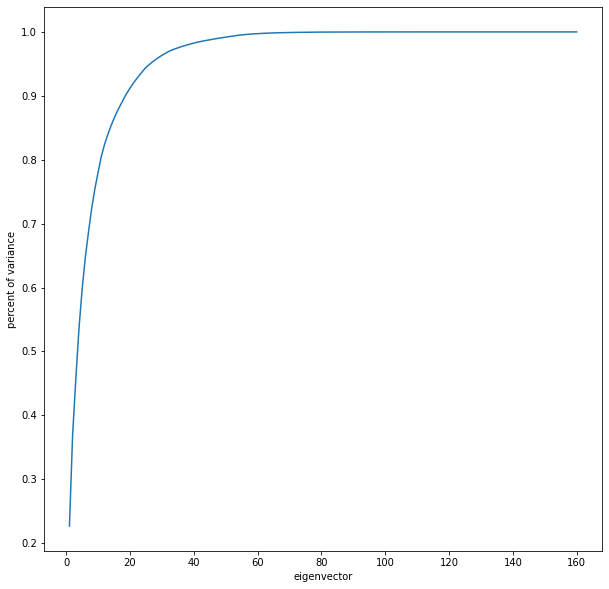

In [191]:
percent_var = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,10))
plt.xlabel('eigenvector')
plt.ylabel('percent of variance')
x =list(range(1,X.shape[1]+1))
sns.lineplot(x=x,y=percent_var)

We see 60 eigen vectors are able to explain almost all the variance.

In [192]:
pca = PCA(n_components=60)
X = pca.fit_transform(X)

Here we use LogisticRegression because PCA best complements a linear model.

In [193]:
model = LogisticRegression().fit(X,y)

In [194]:
X_test = test.drop('Churn',axis=1)
y_test = test['Churn']

In [195]:
X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)

In [196]:
y_test = np.reshape(list(y_test),[len(y_test),1])

In [197]:
y_pred = model.predict(X_test)

In [198]:
print(recall_score(y_test,y_pred))

0.3821917808219178


In [199]:
len(test[test['Churn']==1])/len(test)

0.08384058803261743

We see that using PCA our model far out-performs the previous model for KPI. Here the recall for random model will be 8.3% whereas we get a recall of 38%. Now again we handle class imbalance and retrain our model to get final model. 

### Random Undersampling

In [200]:
rus = RandomUnderSampler()

X_Ru, y_Ru = rus.fit_sample(X, y)
print(X_Ru.shape)

(3406, 60)


In [201]:
model_ru = LogisticRegression().fit(X_Ru,y_Ru)

In [202]:
y_pred = model_ru.predict(X_test)

In [203]:
print('Recall: ',recall_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))

Recall:  0.7945205479452054
Precision:  0.3200883002207506


### Random Oversampling

In [204]:
ros = RandomOverSampler()

X_RO, y_RO = ros.fit_sample(X, y)
print(X_RO.shape)

(37224, 60)


In [205]:
y_RO.sum()/len(y_RO)

0.5

In [206]:
model_ro = LogisticRegression().fit(X_RO,y_RO)

In [207]:
y_pred = model_ro.predict(X_test)

In [208]:
print('Recall: ',recall_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))

Recall:  0.8068493150684931
Precision:  0.33580387685290763


SMOTE

In [209]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
print(X_RO.shape)

(37224, 60)


In [210]:
model_smote = LogisticRegression().fit(X_sm,y_sm)
y_pred = model_smote.predict(X_test)
print('Recall: ',recall_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))

Recall:  0.8027397260273973
Precision:  0.34349355216881594


SMOTE-Tomek

In [211]:
smt = SMOTETomek()
X_smt, y_smt= smt.fit_sample(X, y)


In [212]:
model_tomek = LogisticRegression().fit(X_smt,y_smt)
y_pred = model_tomek.predict(X_test)
print('Recall: ',recall_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))

Recall:  0.8068493150684931
Precision:  0.3390903857225101


Bootstrap sampling

In [213]:
def bootstrap(train,test,train_size=1000):
    train_c = train[train['Churn']==1].reset_index().drop('index',axis=1)
    train_nc = train[train['Churn']==0].reset_index().drop('index',axis=1)
    array_c = np.random.randint(0,len(train_c),train_size)
    array_nc = np.random.randint(0,len(train_nc),train_size)
    train_s_c = train_c.iloc[array_c,:]
    train_s_nc = train_nc.iloc[array_nc,:]
    train_all = pd.concat([train_s_c,train_s_nc],ignore_index=True)
    X = train_all.drop('Churn',axis=1)
    y = train_all['Churn']
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    pca = PCA(n_components=60)
    X = pca.fit_transform(X)
    X_test = test.drop('Churn',axis=1)
    y_test = test['Churn']
    X_test_2 = scaler.transform(X_test)
    X_test_3 = pca.transform(X_test_2)
    return X,y,X_test_3,y_test

In [214]:
X,y,X_test,y_test = bootstrap(train,test)

In [215]:
model = LogisticRegression().fit(X,y)
y_pred = model.predict(X_test)
print('Recall: ',recall_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))

Recall:  0.8095890410958904
Precision:  0.32119565217391305


In [216]:
X,y,X_test,y_test = bootstrap(train,test,train_size=1900)

In [217]:
model = LogisticRegression().fit(X,y)
y_pred = model.predict(X_test)
print('Recall: ',recall_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))

Recall:  0.8178082191780822
Precision:  0.3291069459757442


In [218]:
X,y,X_test,y_test = bootstrap(train,test,train_size=15000)

In [219]:
model = LogisticRegression().fit(X,y)
y_pred = model.predict(X_test)
print('Recall: ',recall_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))

Recall:  0.8136986301369863
Precision:  0.32265073329712113


In [220]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91      7977
         1.0       0.32      0.81      0.46       730

    accuracy                           0.84      8707
   macro avg       0.65      0.83      0.68      8707
weighted avg       0.93      0.84      0.87      8707



In [221]:
model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(X,y)

# Make predictions
y_pred = model_rf.predict(X_test)


In [222]:
print('Recall: ',recall_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))

Recall:  0.726027397260274
Precision:  0.35642232683254876


Random forest is overftting the data.

## Conclusion:
* We see the most important KPIs for churn detection are based on minutes of usage in month 8 ,last dates of recharge in month 8 and change in minutes of usage from month 7 to 8.
* The best model comes out to be logistic regression with with bootstrap sampling, giving an average recal greater than 81%.